# MA4402 Simulación estocástica - Laboratorio $\#$2
**Integrantes:** Antonia Labarca, Manuel Torres.

**Fecha de entrega:** Martes 12 de Octubre, 2021. 

*Antes de correr partes específicas de los problemas 2 o 3, debe reiniciar los métodos que caracterizan las cadenas de Markov (ver preliminares del problema 2), ya que se sobreescribe el método cambiando el espacio de estados.*

# Documentación del notebook: 
## Documentación problema 1
A continuación se presenta la lista de funciones presentes en esta parte del notebook, el detalle y la descripcion de cada una la puede encontrar en su respectivo contrato.

**Funciones de la parte 4:**
```
1) normal_estandar()
2) indicatriz()
3) metodo_definicion()
4) metodo_parte_1()
4) metodo_parte_2()
4) metodo_parte_3()
5) varianza_segun_metodo()
6) grafico_varianza_segun_metodo()
```

**Funciones de la parte 5:**
```
1) grafico_estable_varianza_segun_metodo()
```

**Funciones de la parte 6:**
```
1) alpha_segun_metodo()
2) graficar_alpha_segun_metodo()
```
## Documentación problema 2
A continuación se presenta la lista de funciones presentes en esta parte del notebook, el detalle y la descripcion de cada una la puede encontrar en su respectivo contrato.

**Funciones de la parte 2:**
```
1) Trans()
2) CM()
```
**Funciones de la parte 3:**
```
1) Flujo()
```
**Funciones de la parte 4:**
```
1) matriz_de_transicion_marcha_en_toro()
2) simular_marcha_aleatoria_en_toro()
3) graficar_marcha_aleatoria_en_toro()
4) graficar_marcha_aleatoria_en_toro_polares()
```
## Librerias
Para correr el notebook se requieren las siguientes librerias

In [ ]:
# Librerias para correr el notebook
import numpy as np
from scipy import stats
import math
import random
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
# Estilo de las figuras
sns.set_theme(style="dark")
sns.set_palette('tab10')

# Problema 1 - Reducción de varianza
Consideremos la cantidad
\begin{equation}
    \alpha = \mathbb{E}(e^{bz}1_{Z>0}),
\end{equation}
donde $Z$ es una variable normal estándar y $b\in\mathbb{R}$ es una constante. Supondremos para este problema que la normal estándar es la única variable eficientemente simulable. Se desea aproximar $\alpha$ mediante un algoritmo de Monte Carlo con baja varianza.

## Parte 1 - Método de muestreo preferencial
### Enunciado
Proponga un método de muestreo preferencial.

### Solución
Notemos que 
\begin{equation}
    \alpha = \mathbb{E}(e^{bz}1_{Z>0}) = \int e^{bz}1_{\{z>0\}} f_{Z}(z)dz,
\end{equation}
al desarrollar esta expresión, donde $Z\sim\mathcal{N}(0,1)$, luego al ser conocida la densidad $f_{Z}(z)$ sigue que
\begin{eqnarray*}
    \mathbb{E}(e^{bz}1_{Z>0})
    &=&    \int e^{bz}1_{\{z>0\}} f_{Z}(z)dz\\
    (\text{Reemplazando }f_{Z}(z))
    &=&    \int \left( e^{bz}1_{\{z>0\}} \right)\left( \frac{1}{\sqrt{2\pi}}e^{-z^{2}}\right)dz\\
    (\text{Completando cuadrado})
    &=&    \int \frac{1}{\sqrt{2\pi}} e^{-\frac{(z-b)^{2}}{2}} e^{\frac{b^{2}}{2}} 1_{\{z>0\}} dz\\
    (\text{Cambio de variable})
    &=&    e^{b^{2}/2}\int e^{-z^{2}/2} 1_{\{z+b>0\}} dz ,
\end{eqnarray*} 
donde podemos escribir $1_{\{z+b > 0\}} = 1_{\{z > -b\}}$, así
\begin{eqnarray*}
    \mathbb{E}(e^{bz}1_{Z>0}) 
    &=&    e^{b^{2}/2} \int e^{-z^{2}/2} 1_{\{z+b>0\}} dz\\
    (\text{Cambiando la indicatriz})
    &=&    e^{b^{2}/2} \int e^{-z^{2}/2} 1_{\{z > -b\}} dz\\
    (\text{Escribiéndolo como probabilidad})
    &=&    e^{b^{2}/2} \mathbb{P}(Z > -b)\\
    (\text{Escribiéndolo como esperanza de indicatriz})
    &=&    e^{b^{2}/2} \mathbb{E}(1_{\{Z>-b\}})\\
    (\text{Devolviendo la indicatriz})
    &=&    e^{b^{2}/2} \mathbb{E}(1_{\{Z+b>0\}}\\
    (\text{Linealidad de }\mathbb{E})
    &=&    \mathbb{E}(e^{b^{2}/2}1_{\{Z+b>0\}}).
\end{eqnarray*}

Hemos probado que $\mathbb{E}(e^{bz}1_{Z>0}) = \mathbb{E}(e^{b^{2}/2}1_{\{Z+b>0\}})$, osea que las variables aleatorias $e^{bz}1_{Z>0}$ y $e^{b^{2}/2}1_{\{Z+b>0\}}$, por lo que haremos las *simulaciones de Monte-Carlo* con la variable aleatoria $e^{b^{2}/2}1_{\{Z+b>0\}}$


## Parte 2 - Método de variable de control
### Enunciado
Sabiendo que $\mathbb{E}(e^{bZ}) = e^{b^{2}/2}$, proponga un método de variable de control.
### Solución
**Preliminares:** 


1.   *Control mediante una variable aleatoria auxiliar:* En este caso se trata de sacar ventaja al utilizar una covarianza positiva o negativa. La idea es emplear una variable aleatoria $Y$, con media conocida $\mu_{Y}$, esto es para *controlar* la variable aleatoria $X$ con media desconocida $\mu_{X}$, de forma que ambas variables se encuentren suficientemente correlacionadas, en donde, la versión controlada de $X$ es
\begin{equation}
    X^{\star} = X + c(Y - \mu_{Y}),
\end{equation}
con $\mathbb{E}(X^{\star}) = \mathbb{E}(X) = \mu_{X}$ (por estimar). 

2.   *Minimización de la varianza:* Notemos que las varianzas cumple la relación
\begin{equation}
    \mathbb{V}ar(X^{\star}) = \mathbb{V}ar(X) + c^{2} \mathbb{V}ar(Y) + 2c\mathcal{C}ov(X,Y),
\end{equation}
que se minimiza cuando
\begin{equation}
    c^{\star} = - \frac{\mathcal{C}ov(X,Y)}{\mathbb{V}ar(Y)}
\end{equation}

3.   *Calcular $c^{\star}$:* Para estimar $c^{\star}$ se puede realizar un ajuste lineal de $X$ sobre $Y$ (a partir de simular datos $X_{1},\dots,X_{n},Y_{1},\dots,Y_{n}$. Si tenemos la recta ajustada
\begin{equation}
    \hat{X} = \hat{\beta}_{0} + \hat{\beta}_{1} Y,
\end{equation}
la estimación $c^{\star}$ de $c^{\star}$ es dada por
\begin{equation}
    \hat{c}^{\star} = - \hat{\beta}_{1}
\end{equation}

4.   *Simular $\alpha$:* Podemos estimar $\alpha$ definido antes, donde $\alpha = \mu_{X}$ como
\begin{equation}
    \alpha = \hat{\mu}_{X} = \hat{\beta}_{0} + \hat{\beta}_{1} \mu_{Y}.
\end{equation}
Para la posteior implementación basta con identificar los términos.

**Implementación de la estrategia:** Notemos que
\begin{equation}
    0 < e^{bZ} = e^{bZ}1_{\{Z > 0\}} + e^{bZ}1_{\{Z\leq0\}} 
    \underset{\text{Aplicando la esperanza}}{\Rightarrow}
    e^{bZ} = \mathbb{E}(e^{bZ}) = \mathbb{E}(e^{bZ}1_{\{Z > 0\}}) + \mathbb{E}(e^{bZ}1_{\{Z\leq0\}}) ,
\end{equation}
por lo tanto usando la linealidad de la esperanza sigue que
\begin{equation}
    \alpha \underset{\text{def}}{=} \mathbb{E}(e^{bZ}1_{Z>0}) \underset{\text{Reemplazando igualdad anterior}}{=} e^{b^{2}/2} - \mathbb{E}(e^{bZ}1_{\{Z\leq0\}}),
\end{equation}
de donde es posible hacer *simulaciones de Monte-Carlo* con $e^{bZ}1_{\{b^{bZ}1_{Z<0}\}}$.

## Parte 3 - Método de reducción de varianza con variable antitética
### Enunciado
Mejore el método del ítem anterior usando una variable antitética.
### Solución
**Variables antitéticas:** Si deseamos aproximar $\alpha = \mathbb{E}(Z)$ para alguna variable aleatoria $Z$ con $\mathbb{V}ar(Z) = \sigma^{2}$. Si generamos $n$ pares $(X_{1},Y_{1}), \dots ,(X_{n},Y_{n})$ donde $X\sim Y\sim Z$ tal que $\mathbb{C}ov(X,Y) \leq 0$, el estimador combinado tiene menor varianza, de la forma:
\begin{eqnarray*}
    \mathbb{V}ar\left( \frac{\overline{X} + \overline{Y}}{2} \right)
    =    \frac{1}{4}\left( \mathbb{V}ar(\overline{X}) + \mathbb{V}ar(\overline{Y}) + 2\mathcal{C}ov(\overline{X},\overline{Y}) \right)
    =    \frac{\sigma^{2}}{2} + \frac{1}{2}\mathcal{C}ov(X,Y)
\end{eqnarray*}

**Implementación de la estrategia:** Pendiente (adjuntar demostración).

**Despejar función a simular:** Para comenzar, notemos que una variable aleatoria $Z\sim\mathcal{N}(0,1)$ cumple que $-Z\sim\mathcal{N}(0,1)$. Definimos
\begin{equation}
    h(Z) = 1_{\{Z<0\}}e^{bZ},
\end{equation}
luego utilizando la disminución de varianza tenemos las siguientes cotas:

1.   Para la covarianza:
\begin{equation}
    \mathcal{C}ov(h(Z),h(-Z)) \underset{\text{Def.}}{=} \mathbb{E}( e^{bZ} 1_{\{Z<0\}} e^{-bZ} 1_{\{Z>0\}} ) - \mathbb{E}^{2}( e^{bZ}1_{\{ Z<0 \}} ) \leq 0
\end{equation}

2.   Para la varianza:
\begin{eqnarray*}
        \mathbb{V}ar\left( \frac{h(Z) + h(-Z)}{2} \right)
        &=&    \frac{1}{4}( \mathbb{V}ar(h(Z)) + \mathbb{V}ar(h(-Z)) + 2\mathcal{C}ov(h(Z),h(-Z) )\\
        (\text{Reescribiendo la expresión})
        &=&    \frac{1}{2}(\mathbb{V}ar(h(Z)) + \underbrace{\mathcal{C}ov(h(Z),h(-Z))}_{\leq 0 (\text{Por la cota anterior})}\\
        (\text{Quitando algo negativo acotamos})
        &\leq&    \frac{1}{2}\mathbb{V}ar(h(Z)).
\end{eqnarray*}

Según visto antes, como se reduce la varianza, entonces utilizamos simulaciones de Monte-Carlo con
\begin{equation}
    \frac{h(Z)+h(-Z)}{2}
\end{equation}

## Resumen de las partes 1-3
Tenemos 4 formas para estimar $\alpha$ con Monte-Carlo, estás son:

1.   Usando la definición de $\alpha = \mathbb{E}\left(e^{bZ}1_{\{ Z>0 \}} \right)$.
2.   Utilizando el métrodo de muestreo preferencial (parte 1).
3.   Utilizando el método de variable de control (parte 2).
4.   Utilizando el método de reducción de varianza con variable antitética (parte 3).

Para lo que sigue, consideramos $b = 2$.


## Parte 4 - Varianza de cada uno de los métodos
### Enunciado 
Aproxime numéricamente la raíz de la varianza (desviación estándar) de la variable aleatoria que da lugar a cada uno de los 4 métodos, para distintos tamaños de muestras, y grafique. Obtenga una estimación de la raíz de la varianza en cada caso.
### Solución


In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) normal_estandar()
2) indicatriz()
3) metodo_definicion()
4) metodo_parte_1()
4) metodo_parte_2()
4) metodo_parte_3()
5) varianza_segun_metodo()
6) grafico_varianza_segun_metodo()
============================================================================="""
b = 2
def normal_estandar():
    """=========================================================================
    INPUT: Nada
    ----------------------------------------------------------------------------
    OUTPUT: Retorna una muestra de variable normal estandar
    ========================================================================="""
    X = np.random.random()
    Y = np.random.random()
    output = np.sqrt(-2*np.log(X))*np.cos(2*math.pi*Y)
    return output
def indicatriz(z):
    """=========================================================================
    INPUT: 'z' es variable aleatoria
    ----------------------------------------------------------------------------
    OUTPUT: Retorna la funcion indicatriz para 'z', si z > 1 la indicatriz es 
    uno, y nula en otro caso.
    ========================================================================="""
    if z>0:
        output = 1
        return output
    else:
        output = 0
        return output
def metodo_definicion(z):
    """=========================================================================
    INPUT: 'z' varible aleatoria normal(0,1)
    ----------------------------------------------------------------------------
    OUTPUT: Retorna una variable aleatoria, corresponde a la variable aleatoria
    que define alpha en el problema
    ========================================================================="""
    output = indicatriz(z)*np.exp(b*z)
    return output
def metodo_parte_1(z):
    """=========================================================================
    INPUT: 'z' varible aleatoria normal(0,1)
    ----------------------------------------------------------------------------
    OUTPUT: Retorna la variable aleatoria correspondiente a la parte 1.
    ========================================================================="""
    output = indicatriz(z+b)*np.exp((b**2)/2)
    return output
def metodo_parte_2(z):
    """=========================================================================
    INPUT: 'z' varible aleatoria normal(0,1)
    ----------------------------------------------------------------------------
    OUTPUT: Retorna la variable aleatoria correspondiente a la parte 2.
    ========================================================================="""
    output = indicatriz(-z)*np.exp(b*z)
    return output
def metodo_parte_3(z):
    """=========================================================================
    INPUT: 'z' varible aleatoria normal(0,1)
    ----------------------------------------------------------------------------
    OUTPUT: Retorna la variable aleatoria correspondiente a la parte 3.
    ========================================================================="""
    output = (indicatriz(-z)*np.exp(b*z) +
              indicatriz(z)*np.exp(-b*z))/2
    return output
def varianza_segun_metodo(n,metodo):
    """=========================================================================
    INPUT: La entrada 'n' es la cantidad de replicas y 'metodo' corresponde a 
    alguna de los metodos enlistados:
    1) metodo_definicion()
    2) metodo_parte_1()
    3) metodo_parte_2()
    4) metodo_parte_3()
    ----------------------------------------------------------------------------
    OUTPUT: Entrega un arreglo de 'n' varianzas, que guarda la varianza obtenida
    para todo i=<n replicas.
    ========================================================================="""
    # Inicializacion
    promedio = 0
    varianza = 0
    varianza_de_n_replicas = []
    # Estimacion del promedio de referencia para el estimador de la varianza
    for i in range(n):
        z = normal_estandar()
        promedio = promedio + metodo(z)
    promedio = promedio/n
    # Estimacion de la varianza
    for i in range(n):
        z = normal_estandar()
        varianza = varianza + (metodo(z) - promedio)**2
        if i>=2:
            varianza_de_n_replicas.append(varianza/(i+1))
    output = np.array(varianza_de_n_replicas)
    return output
def grafico_desviacion_estandar_segun_metodo(n,metodo):
    """=========================================================================
    INPUT: La entrada 'n' es la cantidad de replicas y 'metodo' corresponde a 
    alguna de los metodos enlistados:
    1) metodo_definicion()
    2) metodo_parte_1()
    3) metodo_parte_2()
    4) metodo_parte_3(),
    ----------------------------------------------------------------------------
    OUTPUT: Retorna una salida vacia
    ----------------------------------------------------------------------------
    COMENTARIO: grafico_varianza_segun_metodo(n,metodo) es una figura
    de matplotlib
    ========================================================================="""
    if metodo == metodo_definicion:
        titulo = 'Desviación estándar en función de la cantidad de réplicas para el método de la definición'
    elif metodo == metodo_parte_1:
        titulo = 'Desviación estándar en función de la cantidad de réplicas para el método de muestreo preferencial (parte 1)'
    elif metodo == metodo_parte_2:
        titulo = 'Desviación estándar en función de la cantidad de réplicas para el método de variable de control (parte 2)'
    elif metodo == metodo_parte_3:
        titulo = 'Desviación estándar en funcion de la cantidad de réplicas para el método de reducción de varianza con variable antitética(parte 3)'
    varianza = varianza_segun_metodo(n,metodo)
    plt.figure(figsize=(20,6))
    plt.plot(range(n-2),np.sqrt(varianza))
    plt.xlabel('Cantidad de réplicas')
    plt.ylabel('Desviación estándar')
    plt.title(titulo)
    plt.grid()


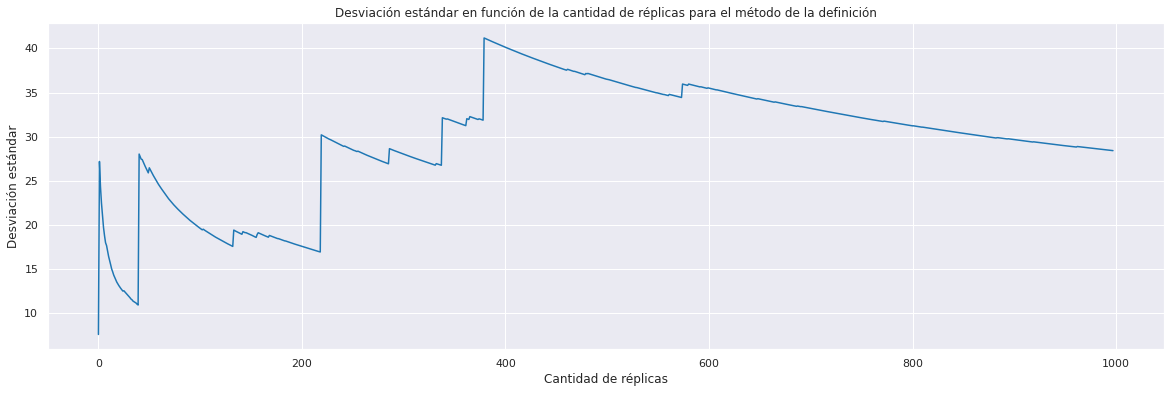

In [ ]:
grafico_desviacion_estandar_segun_metodo(1000,metodo_definicion)

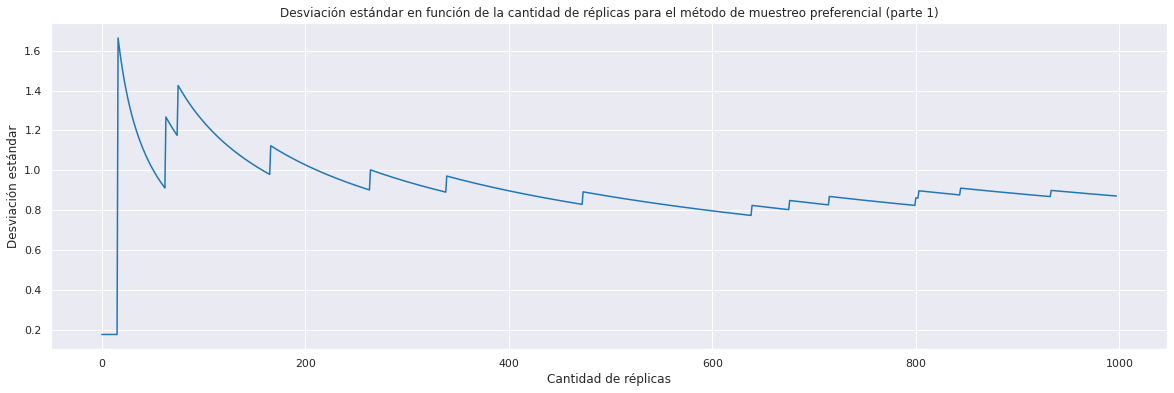

In [ ]:
grafico_desviacion_estandar_segun_metodo(1000,metodo_parte_1)

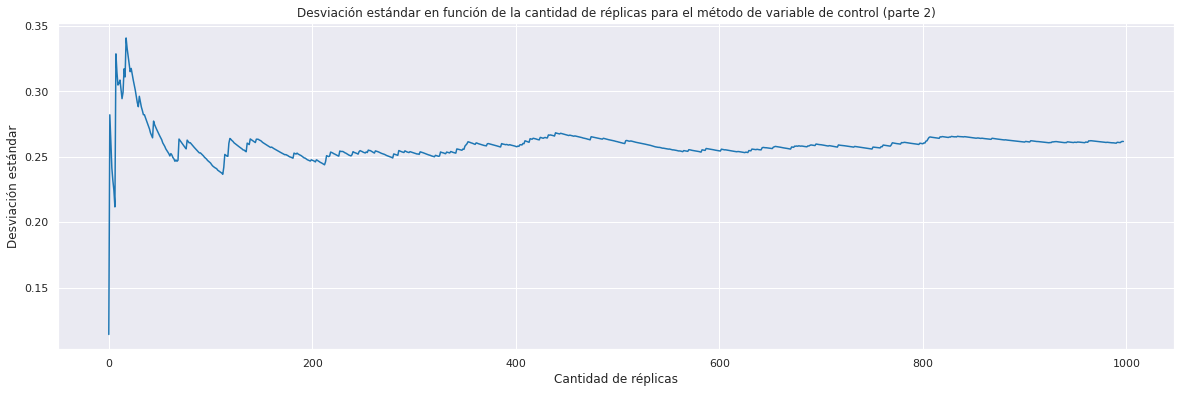

In [ ]:
grafico_desviacion_estandar_segun_metodo(1000,metodo_parte_2)

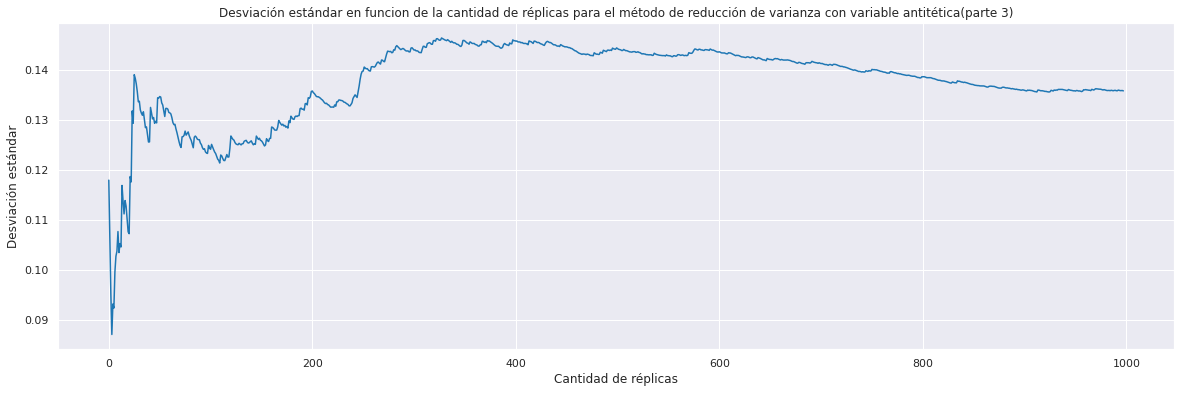

In [ ]:
grafico_desviacion_estandar_segun_metodo(1000,metodo_parte_3)

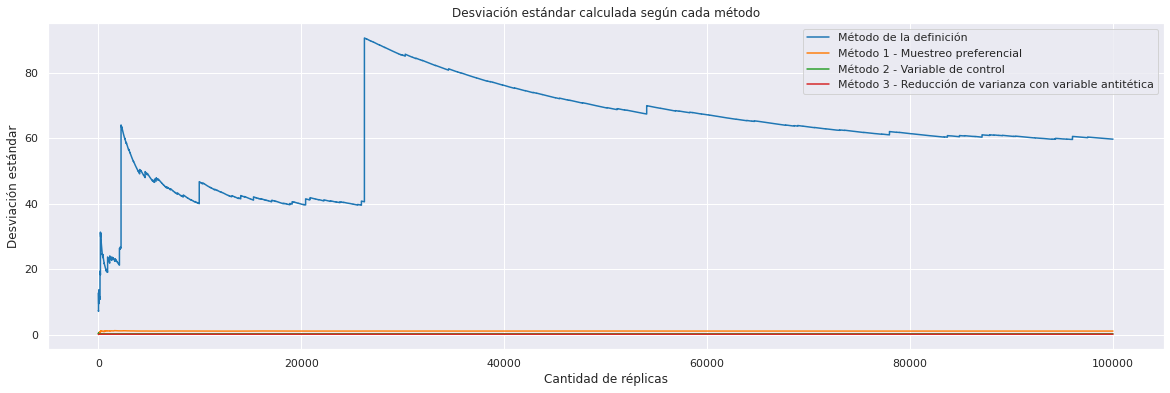

In [ ]:
# Generar un grafico comparando todos los metodos vistos antes, este grafico
# no depende de un metodo graficador.
plt.figure(figsize=(20,6))
n=100000
plt.plot(range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_definicion)),
         range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_parte_1)),
         range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_parte_2)),
         range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_parte_3)))
plt.legend(['Método de la definición', 'Método 1 - Muestreo preferencial', 
            'Método 2 - Variable de control', 
            'Método 3 - Reducción de varianza con variable antitética'])
plt.xlabel('Cantidad de réplicas')
plt.ylabel('Desviación estándar')
plt.title('Desviación estándar calculada según cada método')
plt.grid()

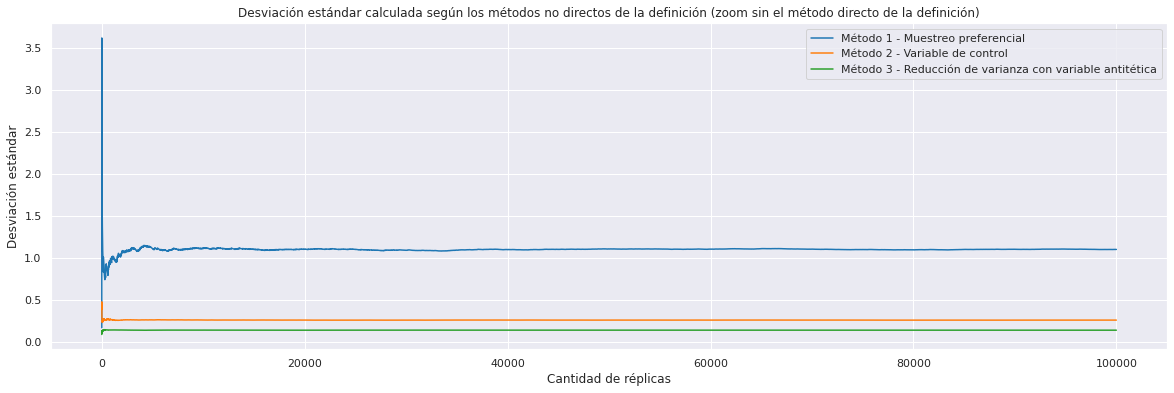

In [ ]:
# Generar un grafico comparando todos los metodos vistos antes, este grafico
# no depende de un metodo graficador, ignorando el método de la definición
plt.figure(figsize=(20,6))
n=100000
plt.plot(range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_parte_1)),
         range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_parte_2)),
         range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_parte_3)))
plt.legend(['Método 1 - Muestreo preferencial', 
            'Método 2 - Variable de control', 
            'Método 3 - Reducción de varianza con variable antitética'])
plt.xlabel('Cantidad de réplicas')
plt.ylabel('Desviación estándar')
plt.title('Desviación estándar calculada según los métodos no directos de la definición (zoom sin el método directo de la definición)')
plt.grid()

A continuación vemos la región en la cual se estabilizan (al menos visualmente) las desviaciones estandar de los métodos *variable de control* y *reducción de varianza*.

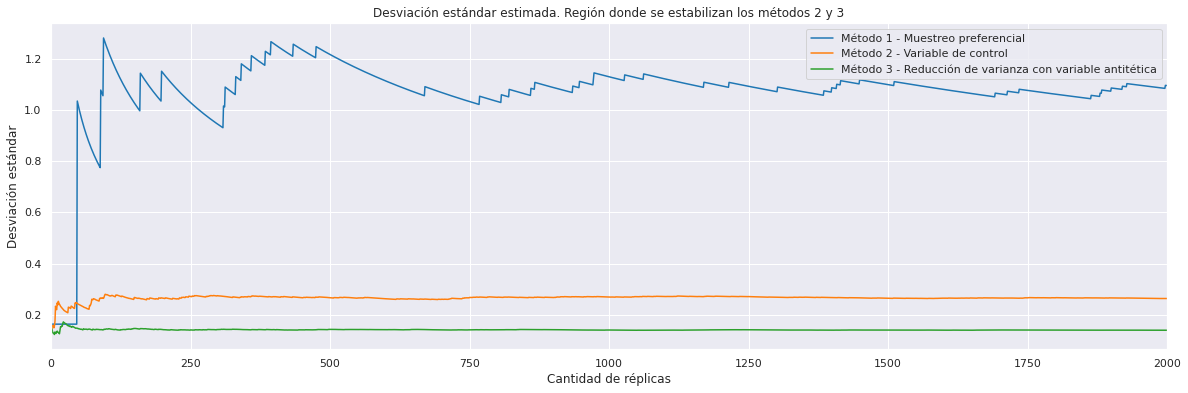

In [ ]:
# Generar un grafico comparando todos los metodos vistos antes, este grafico
# no depende de un metodo graficador, ignorando el método de la definición.
# Focalizando la cola
plt.figure(figsize=(20,6))
n=100000
plt.plot(range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_parte_1)),
         range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_parte_2)),
         range(n-2),np.sqrt(varianza_segun_metodo(n,metodo_parte_3)))
plt.legend(['Método 1 - Muestreo preferencial', 
            'Método 2 - Variable de control', 
            'Método 3 - Reducción de varianza con variable antitética'])
plt.xlabel('Cantidad de réplicas')
plt.ylabel('Desviación estándar')
plt.xlim(0,2000)
plt.title('Desviación estándar estimada. Región donde se estabilizan los métodos 2 y 3')
plt.grid()

In [ ]:
n = 1000000
# Calculo de la varianza segun cada metodo
varianza_definicion = varianza_segun_metodo(n,metodo_definicion)
varianza_metodo_1 = varianza_segun_metodo(n,metodo_parte_1)
varianza_metodo_2 = varianza_segun_metodo(n,metodo_parte_2)
varianza_metodo_3 = varianza_segun_metodo(n,metodo_parte_3)
# Varianza en la replica n
varianzas = [varianza_definicion[-1], 
                varianza_metodo_1[-1],
                varianza_metodo_2[-1], 
                varianza_metodo_3[-1]]
# Desviacion estandar en la replica n
desviaciones = [np.sqrt(varianza_definicion[-1]), 
                np.sqrt(varianza_metodo_1[-1]),
                np.sqrt(varianza_metodo_2[-1]), 
                np.sqrt(varianza_metodo_3[-1])]
# Entregar la informacion en una tabla, se tabula la informacion y luego se 
# utiliza la libreria pandas
datos_de_la_tabla = {'Método usado': ['Método de la definición', 
                                'Método 1 - Muestreo preferencial', 
                                'Método 2 - Variable de control', 
                                'Método 3 - Reducción de varianza'],
                     'Desviación estandar':[desviaciones[0],
                                                desviaciones[1],
                                                desviaciones[2],
                                                desviaciones[3]],
                     'Varianza':[varianzas[0],
                                 varianzas[1],
                                 varianzas[2],
                                 varianzas[3]]}
pd.DataFrame.from_dict(datos_de_la_tabla)

,Método usado,Desviación estandar,Varianza
0,Método de la definición,43.948683,1931.486728
1,Método 1 - Muestreo preferencial,1.099027,1.207859
2,Método 2 - Variable de control,0.256929,0.066013
3,Método 3 - Reducción de varianza,0.137667,0.018952


## Parte 5 - Valor de $n$ (cantidad de réplicas) confiable 
### Enunciado 
Usando la estimacion de la raiz de la varianza del punto previo y aproximando con el *teorema del límite central*, calcule el tamaño de muestrea necesario para cada método de modo de que el error obtenido sea inferior a $\varepsilon = 0.02$ con probabilidad del $95\%$. Comente sus resultados.
### Solución
El objetivo es buscar $n\in\mathbb{N}$ tal que
\begin{equation}
    \frac{Z^{2}_{\alpha/2} \cdot \sigma^{2}}{\varepsilon^{2}} \leq n,
\end{equation}
para $\alpha = 0.05$, probabilidad $p = 0.95$ y $\varepsilon = 0.02$, calculamos el menor $n$ necesario para satisfacer la desigualdad anterior.

**Calculo de $n$**: Utilizamos los datos y calculamos usando el siguiente código:

In [ ]:
# Parametros para calcular n
alpha = 0.05
epsilon = 0.02
z_alpha_2 = stats.norm.ppf(1-alpha)**2
# Calculo de n para todos los metodos
n_suficiente = []
for i in range(4):
    n = (varianzas[i]*z_alpha_2**2)/epsilon**2
    n = int(n+1)
    n_suficiente.append(n)
# Entregar la informacion en una tabla, se tabula la informacion y luego se 
# utiliza la libreria pandas
datos_de_la_tabla = {'Método usado': ['Método de la definición', 
                                'Método 1 - Muestreo preferencial', 
                                'Método 2 - Variable de control', 
                                'Método 3 - Reducción de varianza'],
                     'Valor suficiente para n':[n_suficiente[0],
                                                n_suficiente[1],
                                                n_suficiente[2],
                                                n_suficiente[3]]}
pd.DataFrame.from_dict(datos_de_la_tabla)

,Método usado,Valor suficiente para n
0,Método de la definición,35346040
1,Método 1 - Muestreo preferencial,22104
2,Método 2 - Variable de control,1209
3,Método 3 - Reducción de varianza,347


**Comentarios sobre los resultados:** Los métodos en eficiencia, esto es, según la cantidad de réplicas necesarias para obtener una estimación confiable son, en orden decreciente:

1.   Método 3 - Reducción de varianza (el que requiere menos réplicas).
2.   Método 2 - Variable de control.
3.   Método 1 - Muestreo preferencial.
4.   Método de la definición (cálculo directo, requiere más réplicas).

Notemos que el método de *reducción de varianza* requiere un orden de magnitud menos de réplicas que el segundo método más eficiente (*variable de control*), mientras que la diferencia entre el método más eficiente y el más ineficiente (directo de la definición) es de 5 órdenes de magnitud.

**Visualización de resultados con $n$**: A continuación vemos en las figuras cómo se estabiliza la estimación de la varianza (que caracteriza la desviación 

1.   Elemento de la lista
2.   Elemento de la lista

estándar):

In [ ]:
def grafico_estable_varianza_segun_metodo(n,metodo):
    """=========================================================================
    INPUT: La entrada 'n' es la cantidad de replicas y 'metodo' corresponde a 
    alguna de los metodos enlistados:
    1) metodo_definicion()
    2) metodo_parte_1()
    3) metodo_parte_2()
    4) metodo_parte_3(),
    Ademas la entrada 'titulo' es un str donde se debe especificar el titulo
    de la figura.
    Además, 'i' es el numero del metodo (para poder elegir la comparacion 
    teorica adecuada, es redundante con la eleccion del metodo).
    ----------------------------------------------------------------------------
    OUTPUT: Retorna una salida vacia
    ----------------------------------------------------------------------------
    COMENTARIO: grafico_varianza_segun_metodo(n,metodo,titulo) es una figura
    de matplotlib
    ========================================================================="""
    if metodo == metodo_definicion:
        i = 0
        titulo = 'Método directo de la definición: Estimación de la varianza con un error menor a 0.02, probabilidad 0.95 y alpha = 0.05.'
    elif metodo == metodo_parte_1:
        i = 1
        titulo = 'Método 1 - Muestreo preferencial: Estimación de la varianza con un error menor a 0.02, probabilidad 0.95 y alpha = 0.05.'
    elif metodo == metodo_parte_2:
        i = 2
        titulo = 'Método 2 - Variable de control: Estimación de la varianza con un error menor a 0.02, probabilidad 0.95 y alpha = 0.05.'
    elif metodo == metodo_parte_3:
        i = 3
        titulo = 'Método 3 - Reducción de varianza: Estimación de la varianza con un error menor a 0.02, probabilidad 0.95 y alpha = 0.05.'
    # Eje x
    cantidad_de_la_muestra = np.arange(0, n)
    # Configuracion de la figura
    varianza = varianza_segun_metodo(n,metodo)
    plt.figure(figsize=(20,6))
    plt.plot(range(n-2),varianza)
    plt.xlabel('Cantidad de réplicas')
    plt.ylabel('Varianza')
    plt.title(titulo)
    plt.grid()
    # Franja de confiabilidad
    plt.fill_between(cantidad_de_la_muestra, varianzas[i]-0.02*varianzas[i], 
                     varianzas[i]+0.02*varianzas[i], alpha = 0.05,
                     edgecolor='red', facecolor='red')

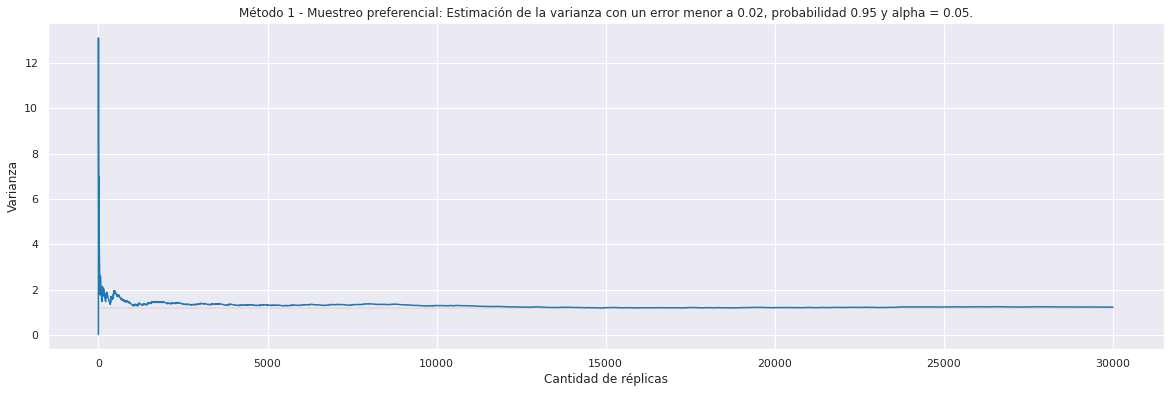

In [ ]:
grafico_estable_varianza_segun_metodo(30000,metodo_parte_1)

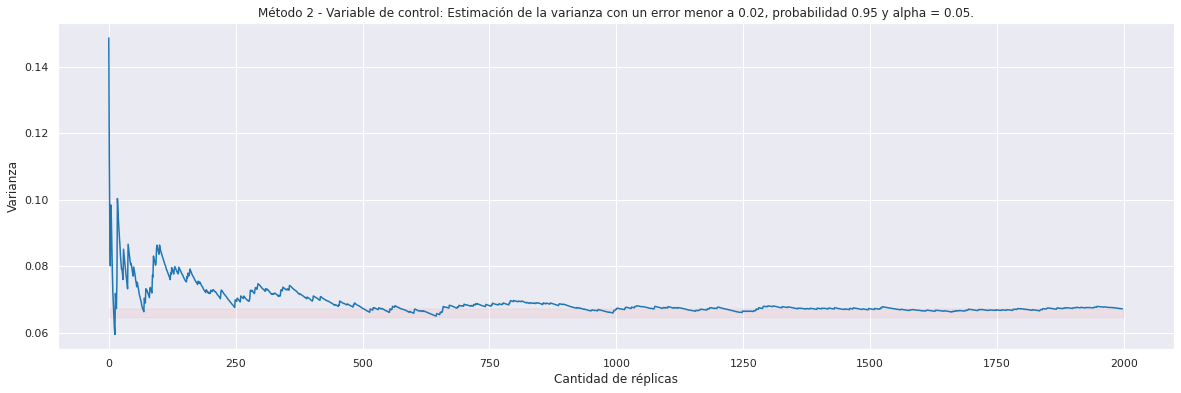

In [ ]:
grafico_estable_varianza_segun_metodo(2000,metodo_parte_2)

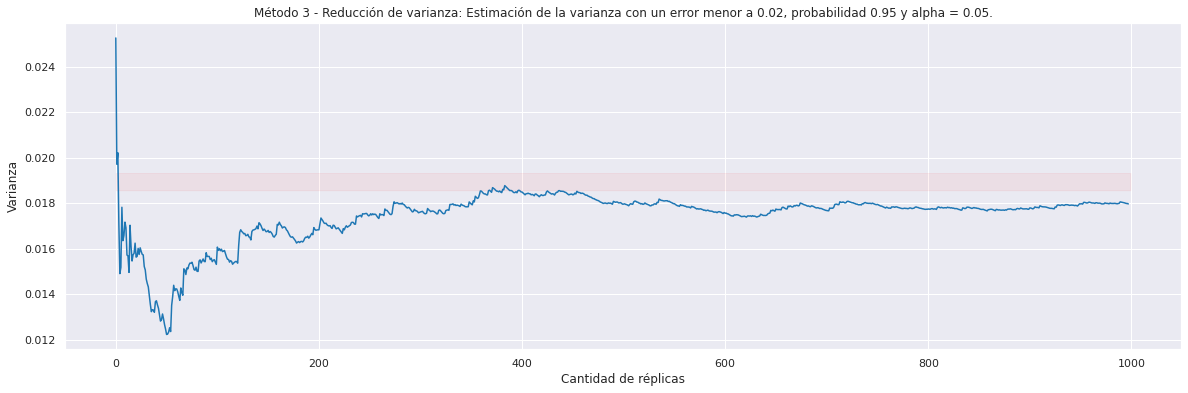

In [ ]:
grafico_estable_varianza_segun_metodo(1000,metodo_parte_3)

## Parte 6 - Estimación de $\alpha$
### Estimación
Sea $N_{\text{max}}$ el tamaño de muestra máximo entre los calculados en el ítem anterior para los tres métodos propuestos por usted (es decir, excluyyendo el método que usa la definición directamente). Para distintos tamaños de muestra crecientes hasta $N_{max}$, obtenga la estimación de $\alpha$ de cada uno de los cuatro métodos y grafique.
### Solución 

In [ ]:
"""=============================================================================
FUNCIONES DE LA CELDA:
1) alpha_segun_metodo()
2) graficar_alpha_segun_metodo()
============================================================================="""
# Se define n tal que los metodos de las partes 1,2 y 3 den un valor de cierta
# manera preciso
n = 23000
def alpha_segun_metodo(n,metodo):
    """=========================================================================
    INPUT: 'n' es la cantidad de replicas, 'metodo' es el metodo a utilizar para
    calcular alpha
    ----------------------------------------------------------------------------
    OUTPUT: retorna el valor estimado de alpha utilizando el 'metodo' indicado en
    el input con una cantidad de replicas 'n'.
    ========================================================================="""
    promedio = 0
    promedio_de_n_replicas = []
    for i in range(n):
        z = normal_estandar()
        promedio = promedio + metodo(z)
        if i >= 1:
            promedio_de_n_replicas.append(promedio/(i+1))
    if metodo == metodo_definicion:
        output = promedio_de_n_replicas
    elif metodo == metodo_parte_1:
        output = promedio_de_n_replicas
    elif metodo == metodo_parte_2:
        output = np.exp((b**2)/2) - promedio_de_n_replicas
    elif metodo == metodo_parte_3:
        output = np.exp((b**2/2)) - promedio_de_n_replicas
    return output
def graficar_alpha_segun_metodo(n,metodo):
    """=========================================================================
    INPUT: 'n' es la cantidad de replicas, 'metodo' es el metodo de estimacion
    que se utiliza para calcular alpha.
    ----------------------------------------------------------------------------
    OUTPUT: no retorna nada, pero muestra la figura de alpha en funcion de la
    cantidad de replicas.
    ========================================================================="""
    fig, ax = plt.subplots(figsize=(20, 6))
    alpha = alpha_segun_metodo(n,metodo)
    plt.plot(range(n-1),alpha)
    plt.xlabel('Cantidad de réplicas')
    plt.ylabel('Valor de alpha')
    if metodo == metodo_definicion:
        i=0
        plt.title('Cálculo de alpha con el método de la definición')
    elif metodo == metodo_parte_1:
        i=1
        plt.title('Cálculo de alpha con el método 1: Muestreo preferencial')
    elif metodo == metodo_parte_2:
        i=2
        plt.title('Cálculo alpha con el método 2: Variable de control')
    elif metodo == metodo_parte_3:
        i=3
        plt.title('Cálculo alpha con el método 3: Reducción de varianza')
    if i > 0:
        epsilon = 0.02
        ax.fill_between(range(n-2), (alpha[-1]-epsilon),
                        (alpha[-1]+epsilon), color='red', alpha=0.1,
                        label = 'Intervalo de confianza del 95$\%$'.format((1-0.05)*100))
    plt.grid()


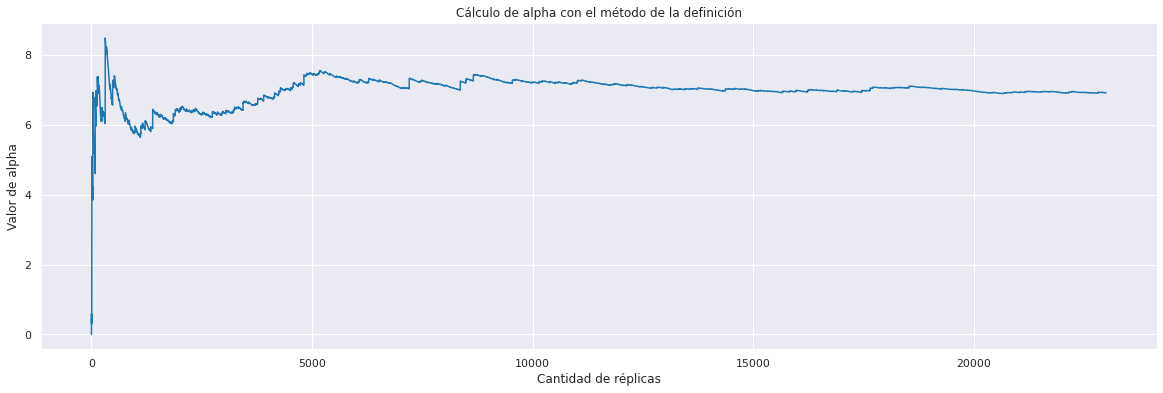

In [ ]:
graficar_alpha_segun_metodo(23000,metodo_definicion)

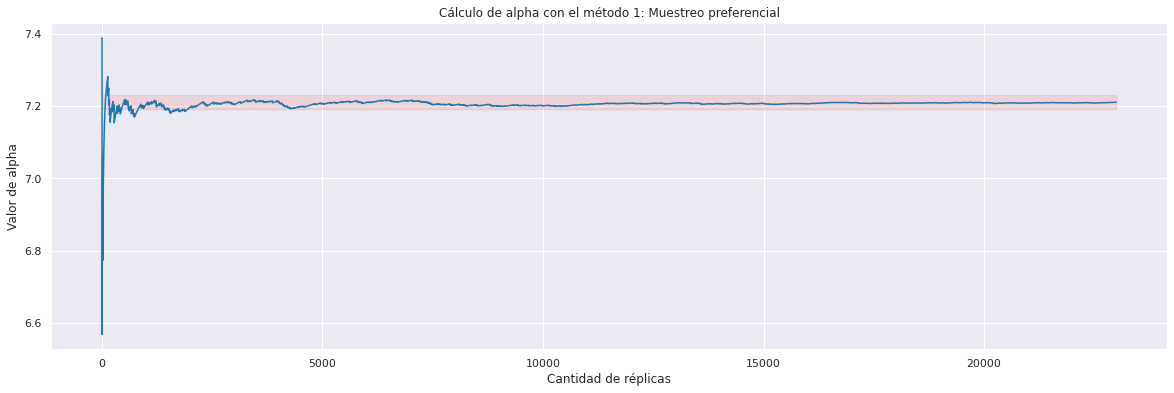

In [ ]:
graficar_alpha_segun_metodo(23000,metodo_parte_1)

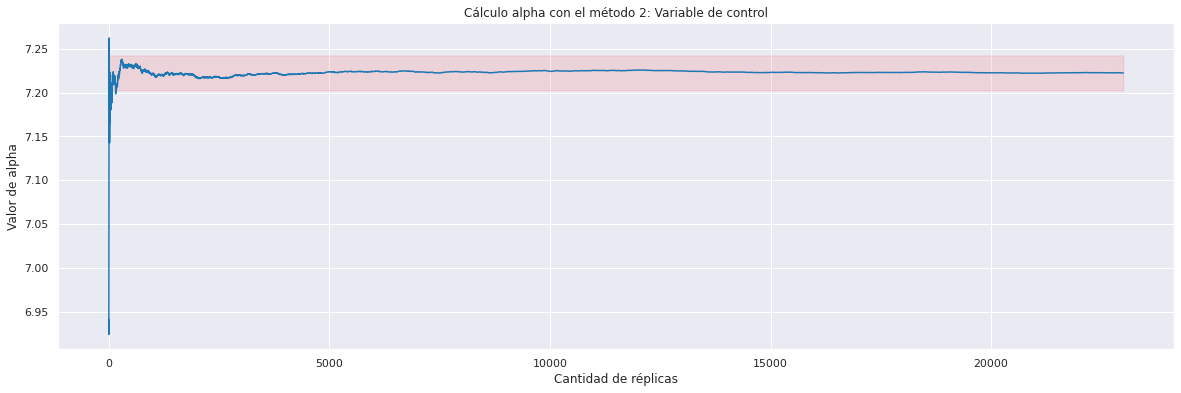

In [ ]:
graficar_alpha_segun_metodo(23000,metodo_parte_2)

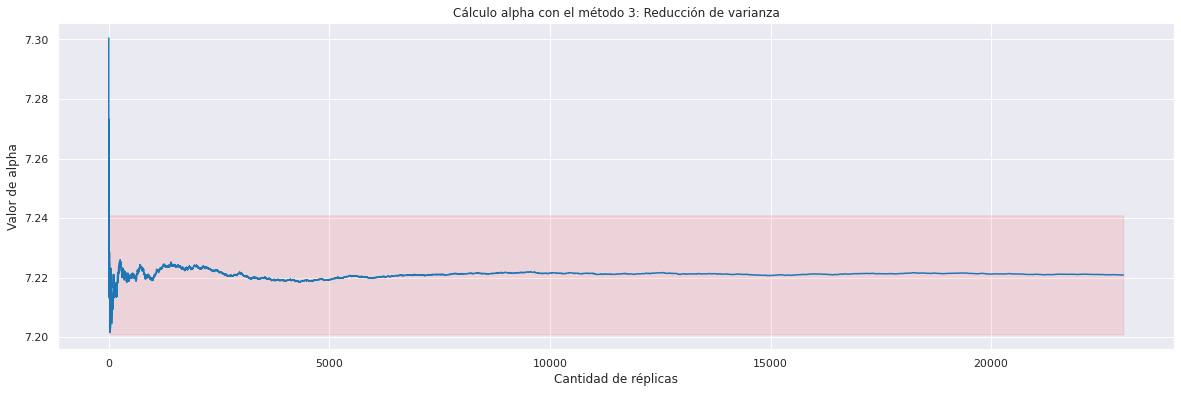

In [ ]:
graficar_alpha_segun_metodo(23000,metodo_parte_3)

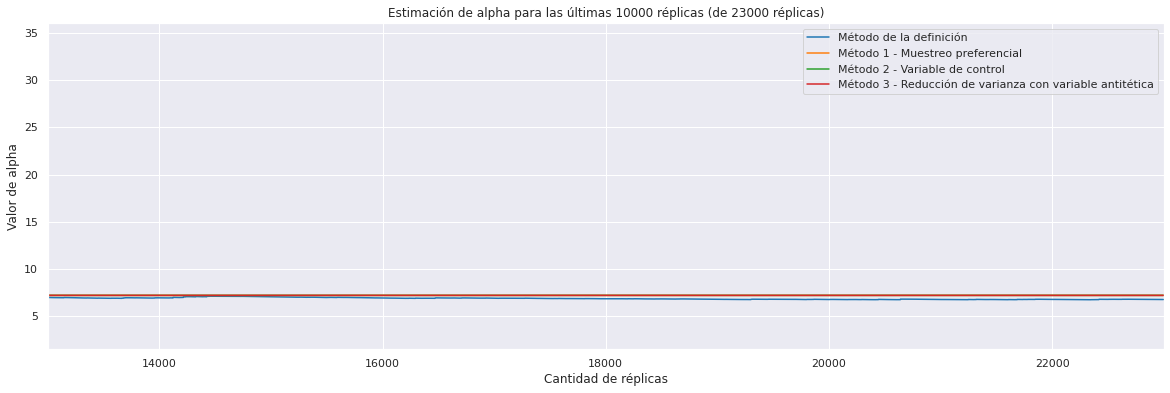

In [ ]:
# Generar un grafico comparando todos los metodos vistos antes, este grafico
# no depende de un metodo graficador.
n = 23000
cola = 10000
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(range(n-1),alpha_segun_metodo(n,metodo_definicion),
         range(n-1),alpha_segun_metodo(n,metodo_parte_1),
         range(n-1),alpha_segun_metodo(n,metodo_parte_2),
         range(n-1),alpha_segun_metodo(n,metodo_parte_3))
plt.xlim(n-10000,n)
plt.xlabel('Cantidad de réplicas')
plt.ylabel('Valor de alpha')
plt.legend(['Método de la definición', 'Método 1 - Muestreo preferencial', 
            'Método 2 - Variable de control', 
            'Método 3 - Reducción de varianza con variable antitética'])
plt.title('Estimación de alpha para las últimas 10000 réplicas (de 23000 réplicas)')
plt.grid()

**Comentario sobre los gráficos:** Es evidente de las figuras anteriores que los métodos de *muestreo preferencial*, *variable de control* y *reducción de varianza* convergen a un mismo resultado dentro del rango estudiado, este es, hasta un muestreo de $n = 23000$ réplicas, lo que va de la mano con la reducción de la varianza visto en la parte anterior.Por otro lado, el método de cálculo directo mediante la definición de $\alpha$ parece ser el más inestable ya que no logra converger al mismo valor que los demás métodos.

Por otro lado, viendo las figuras de cada uno de los métodos aislados, se observa que el *método de reducción de varianza* y el *método de variable de control* se estabilizan en torno a un valor antes de las 5000 réplicas, mientras que el método de muestreo preferencial lo hace después de las 10000 réplicas.

## Parte 7 - Discusión sobre la exactitud
### Enunciado
En base a lo obtenido en los puntos previos, ¿cuál método es el mejor y cál el peor? Obtenga e lvalor exacto de $\alpha$ usando una herramienta adecuada (por ejemplo wolframalpha), y compare con el valor entregado por los cuatro métodos, usando el mismo $N_{max}$ para todos. Comente.
### Solución

**WolframAlpha:** Ingresando la integral definida 
\begin{equation}
    \alpha = \int_{0}^{+\infty} \frac{1}{\sqrt{2\pi}} e^{-x^{2}/2}e^{2x}dx,
\end{equation}
obtenemos:


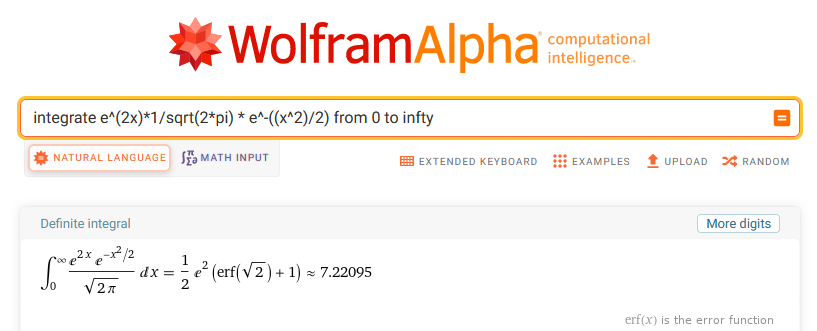

**Método más exacto:** Para el valor de $\alpha$ obtenido con $n = 23000$ réplicas de la variable aleatoria $Z$ tenemos que el indicador
\begin{equation}
    |\alpha_{\text{Teórico}} - \alpha_{\text{Método_{i}}}|
\end{equation}
se muestra en la siguiente tabla, según cada método:

In [ ]:
n=23000
# Tabla de la diferencia de alpha teorico con alpha simulado segun cada metodo
datos_de_la_tabla = {'Método usado': ['Método de la definición', 
                                'Método 1 - Muestreo preferencial', 
                                'Método 2 - Variable de control', 
                                'Método 3 - Reducción de varianza'],
                     '|alpha_exp. - alpha_teo.|':
                            [np.abs(alpha_segun_metodo(n,metodo_definicion)[-1] - 7.22),
                              np.abs(alpha_segun_metodo(n,metodo_parte_1)[-1] - 7.22),
                              np.abs(alpha_segun_metodo(n,metodo_parte_2)[-1] - 7.22),
                              np.abs(alpha_segun_metodo(n,metodo_parte_3)[-1] - 7.22)]}
pd.DataFrame.from_dict(datos_de_la_tabla)

,Método usado,|alpha_exp. - alpha_teo.|
0,Método de la definición,0.245407
1,Método 1 - Muestreo preferencial,0.008746
2,Método 2 - Variable de control,0.003927
3,Método 3 - Reducción de varianza,0.003301


**Conclusión:** Basándonos en la tabla anterior, el método de *reducción de varianzas* es por un orden de magnitud más exacto que los métodos de *muestreo preferencial* y de *variable de control*, además el método de reducción de varianza requiere una cantidad de réplicas menor para obtener valores confiables según lo visto en la **parte 5**, y según lo visto en la **parte 4** también este método posee una menor varianza. Concluyendo así que el método de reducción de varianza resulta ser en todos los aspectos vistos el más conveniente.

**Propuesta:** En caso de no ser suficiente para decidir el método, se puede estudiar el tiempo de ejecución en función de la cantidad de réplicas.

# Problema 2 - Simulación de cadenas de Markov y flujos Markovianos
Sea $E$ un conjunto finito que supondremos sin perder generalidad que es de la forma $\{1,\dots,N\}$, donde $N\in\mathbb{N}$ es fijo. Sea $f:E\times[0,1]\to E$ una función, $X_{0}$ una variable aleatoria con ley $\mu$ y $(U_{n})_{n\geq1}$ una colección de variables aleatorias independientes e idénticamente distribuídas con distribución uniforme sobre $[0,1]$, e independientes de $X_{0}$. Para $n\geq0$ se define por recurrencia la sucesión aleatoria
\begin{equation}
    X_{n+1} = f(X_{n},U_{n+1}).
\end{equation}
Además, $(X_{n})_{n\geq1}$ resulta ser una *cadena de Markov homogénea*.

## Parte 1 - Caracterizar cadena de Markov
### Enunciado
Sea $P$ una matriz estocástica indexada por $E$. Si $f$ es una función tal que $\mathbb{P}(f(x,U)=y) = P_{xy}$ para todo $x,y\in E$, además diremos que es una *función de transición* asociada a la matriz $P$. Veamos que
\begin{equation}
    f(x,u) = \inf\left\{ y\in E : \sum_{z=1}^{y} P_{xz} \geq u \right\}
\end{equation}
es una función de transición de la matriz $P$, y que además la cadena $(X_{n})_{n\in\mathbb{N}}$ así construída tiene entonces matriz de transición $P$.

### Solución
Para demostrar lo enunciado antes, consideramos la función $f$ descrita antes, donde $U\sim\text{Unif}(0,1)$, luego notemos que $P$ al ser una matriz estocástica se cumple que
\begin{equation}
    (\forall x,y\in\{1,\dots,N\}),\quad 0\leq \sum_{z=1}^{y} P_{xz} \leq 1 \text{ y }\sum_{z=1}^{N} P_{xz} = 1 
\end{equation}
Usando lo anterior tenemos
\begin{eqnarray}
    \mathbb{P}( f(x,U) = y )
    &=& \mathbb{P}\left( \inf\left\{ y'\in E : \sum_{z=1}^{y'} P_{xz} \geq u \right\} = y\right)\\
    (\text{Explicitando las cotas})
    &=& \mathbb{P}\left( \sum_{z=1}^{y} P_{xz} \geq U, \sum_{z=1}^{y-1} P_{xz} < U \right)\\
    (\text{Reescribiendo el intervalo})
    &=& \mathbb{P}\left( \sum_{z=1}^{y-1} P_{xz} < U \leq \sum_{z=1}^{y} P_{xz} \right)\\
    \left(\text{Como }U\sim\text{Unif}(0,1)\text{ y }\sum_{z=1}^{y-1} P_{xz},\sum_{z=1}^{y} P_{xz}\in[0,1]\right)
    &=& \sum_{z=1}^{y} P_{xz} - \sum_{z=1}^{y-1} P_{xz}\\
    (\text{Reordenando la suma})
    &=& P_{xy} + \sum_{z=1}^{y-1} P_{xz} - \sum_{z=1}^{y-1} P_{xz} = P_{xy},
\end{eqnarray}
de lo que se concluye que $f$ es una función de transición de la matriz $P$, y por lo tanto la cadena de Markov $(X_{n})_{n\in\mathbb{N}}$ tiene matriz de transición $P$.

## Parte 2 - Cadena de Markov numérica
### Enunciado 
1.   Programe una función $\text{Trans}(x,u,P)$ que tiene como parámetros un valor $u\in[0,1]$ y una matriz estocástica $P$ indexada por $\{1,\dots,N\}$, y entrega para cada $x$ el valor correspondiente de la función de transición $f$ asociada a $P$ con el parámetro $u$ dado. Para esto es posible usar una función ya programada en el laboratorio 1.
2.   Además, y utilizando lo anterior programe un método $\text{CM}(mu,P,n)$ que simule $n$ pasos de la cadena de Markov homogénea con matriz de transición $P$ y distribución inicial $mu$.

### Solución
Hacemos los métodos solicitados en la siguiente celda de código.

In [ ]:
def Trans(x,u,P):
    """=========================================================================
    INPUT: 'x' corresponde al estado de la cadena. 'u' corresponde al valor que
    toma la variable aleatoria uniforme U. 'P' es la matriz estocastica (de 
    transicion).
    ----------------------------------------------------------------------------
    OUTPUT: Retorna la imagen de '(x,u)' mediante la funcion de transicion 'f'.
    ----------------------------------------------------------------------------
    COMENTARIO: Version numerica de la funcion de transicion. Avanza en un
    tiempo el estado de la cadena de Markov.
    ========================================================================="""
    # Suponiendo un espacio de estados discreto y finito, de la forma
    # {1,2,3,4,...,N-1,N}
    valor_transicion = 1  
    while sum(P[x-1][:valor_transicion])<u: # Condicion de la probabilidad
        valor_transicion = valor_transicion+1
    output = valor_transicion
    return output
def CM(mu,P,n):
    """=========================================================================
    INPUT: 'mu' es el estado, 'P' es matriz de transicion y 'n' la cantidad
    de pasos que se desea simular para la cadena de Markov (mu,P). 
    ----------------------------------------------------------------------------
    Output: Retorna una lista con una simulacion de una cadena de Markov con
    distribucion inicial 'mu' y matriz de transicion 'P'.
    ----------------------------------------------------------------------------
    COMENTARIO: Simula 'n' pasos de una cadena de Markov, para esto el metodo
    utiliza el metodo -Trans()- para generar cada estado de forma iterativa, 
    para luego retornar un arreglo con todos los estados por los que paso la 
    cadena.
    ========================================================================="""
    cadena_de_markov = [mu]     # Cadena de markov con un estado inicial dado
    for i in np.arange(n-1):    # Hacemos transiciones para obtener muestras
        # Usamos la funcion Trans(x,)
        cadena_de_markov.append(
            Trans(cadena_de_markov[i],np.random.uniform(0,1),P)
            )
    output = cadena_de_markov 
    return output

## Parte 3 - Flujo
### Enunciado
*   Note que ahora dadas realizaciones $(U_{n})_{n\geq1}$ de variables aleatorias i.i.d. uniformes en $[0,1]$, disponemos de una *sucesión de funciones (aleatorias)* $\Phi_{n}:=f(\cdot,U_{n}):E\to E$, con $n\geq1$, que entregan transiciones de la cadena desde un estado $x$ cualquiera en el tiempo $n-1$, a algún estado $y = \Phi_{n}(x) = f(x,U_{n})$ en el tiempo $n$.
*   Más aún, disponemos de un *flujo aleatorio* $(\Phi_{n,m}:E\to E)_{m>n\geq0}$ dado por la siguiente relación (de composiciones)
\begin{equation}
    \Phi_{n,m}(x) = (\Phi_{m} \circ \cdots \circ \Phi_{n})(x),
\end{equation}
que puede entregar las transiciones de la cadena desde cualquier estado $x$ en el tiempo $n-1$, a algún estado $y = \Phi_{n,m}(x)$ en el tiempo $m$.
*   En base a la función construida en la **parte 1**, construya ahora una función $\text{Flujo}(x,n,m,u,P)$ que toma como parámetros un vector $u$ de $m-n+1$ valores en $[0,1]$ y una matriz estocástica $P$, y entrega para todo $x$, el estado en el tiempo $m$ de una cadena que se encuentra en $x$ en el tiempo $n-1$ obtenido al hacer $m-n+1$ transiciones sucesivas con la función de transición asociada a la matriz $P$.

### Solución
Hacemos el método en la siguiente celda de código.

In [ ]:
def Flujo(x,n,m,u,P):
    """=========================================================================
    INPUT: La cadena se encuentra en el estado 'x' en un tiempo 'n-1'. Se 
    evoluciona la cadena hasta un tiempo 'm' tal que 'm'>'n'. La cadena de 
    markov a estudiar es con estado inicial 'u' y matriz de transicion 'P'.
    ----------------------------------------------------------------------------
    OUTPUT: Retorna el estado de la cadena en el tiempo 'm'.
    ----------------------------------------------------------------------------
    COMENTARIO: A partir de una cadena de markov en tiempo n-1 con estado x,
    simula un estado para un tiempo posterior m usando la propiedad de perdida
    de memoria.
    ========================================================================="""
    estado = x              # Escribimos el estado en el tiempo n-1.
    for i in range(m-n+1):  # Evolucionamos la cadena a un estado posterior.
        # Hacemos una transicion entre el estado i hacia el estado i+1.
        estado = Trans(estado, u[i], P)
    output = estado
    return output

## Parte 4 - Simulación de trayectorias en el toro $\{1,\dots,10\}$
### Enunciado
Usando las funciones construidas en las partes previas, y utilizando solo $n = 100$ variables aleatorias uniformes, simule y grafique $n=100$ pasos de $K = 10$ trayectorias de un paseo aleatorio en el toro discreto de tamaño $N = 10$, donde cada trayectoria parte de un estado distinto. Realice esto en cada uno de los casos siguientes:

1.   $p = \frac{1}{2}$,
2.   $p = \frac{1}{3}$,
3.   $p = \frac{2}{3}$,

donde $p$ es la probabilidad de pasar del estado $x$ al estado $x+1$ en módulo $N$, y $1-p$ es la probabilidad del evento complementario. 
### Solución


In [ ]:
def matriz_de_transicion_marcha_en_toro(p):
    """=========================================================================
    INPUT: La probabilidad de avanzar un paso a la derecha es 'p', y de avanzar
    un paso a la izquierda es '1-p'.
    ----------------------------------------------------------------------------
    OUTPUT: Matriz de transicion de una marcha aleatoria en un toro discreto de
    tamaño N.
    ----------------------------------------------------------------------------
    COMENTARIO: Este metodo genera la matriz de transicion P para una marcha
    aleatoria en un toro discreto de tamaño N, el tamaño del toro discreto 
    que determina el espacio muestral y el tamaño de la matriz P no es un 
    parametro del metodo, pero puede editarse internamente.
    COMENTARIO 2: En caso de desear estudiar muestras de distinto tamaño se 
    puede editar este metodo para que reciba 'N' de input, donde N sera el 
    tamaño del todo discreto.
    ========================================================================="""
    N = 10                         # Tamaño del toro discreto
    matriz = np.zeros((N,N))       # Matriz de transicion de la marcha
    for i in range(N):             # Se rellenan las celdas de la matriz
        matriz[i,(i+1)%N]=p        # Paso a la derecha
        matriz[i,(i-1)%N]=1-p      # Paso a la izquierda (evento complementario)
    output = matriz
    return output
def simular_marcha_aleatoria_en_toro(p):
    """=========================================================================
    INPUT: La probabilidad de avanzar un paso a la derecha es 'p', y de avanzar
    un paso a la izquierda es '1-p'.
    ----------------------------------------------------------------------------
    OUTPUT: Simula 10 trayectorias de una marcha aleatoria sobre el toro 
    discreto de tamaño N
    ----------------------------------------------------------------------------
    COMENTARIO: Dentro del codigo estan los parametros 'K' que indica la
    cantidad de trayectorias a simular, y 'n' que indica el numero de pasos
    de la trayectoria de las trayectorias.
    ========================================================================="""
    K = 10              # Cantidad de trayectorias
    n = 100             # Numero de pasos de la cadena de Markov
    # Generamos la matriz de transicion con el parametro p del input y
    # usando el metodo -matriz_de_transicion_marcha_en_toro-.
    matriz = matriz_de_transicion_marcha_en_toro(p)
    # Generamos K trayectorias de largo n de la cadena de markov, K>1 sirve
    # para comparar distintas trayectorias, con K = 1 basta para simular una
    # cadena de markov con sus trayectorias.
    trayectorias_de_la_cadena = np.zeros((K,n))  # Para guardar las trayectorias
    # Generamos una muestra de n variables uniformes.
    uniforme = np.random.uniform(0,1,n)
    # Simulamos las K trayectorias para n cadenas de Markov
    for i in range(K):
        # Estado inicial de cada trayectoria
        trayectorias_de_la_cadena[i,0] = i+1
        # Elaboramos las trayectorias
        for j in range(1,n):                    
            trayectorias_de_la_cadena[i,j] = Trans(
                int(trayectorias_de_la_cadena[i,j-1]),
                uniforme[j],
                matriz)
    output = trayectorias_de_la_cadena
    return output
def graficar_marcha_aleatoria_en_toro(p):
    """=========================================================================
    INPUT: La probabilidad de avanzar un paso a la derecha es 'p', y de avanzar
    un paso a la izquierda es '1-p'.
    ----------------------------------------------------------------------------
    OUTPUT: Grafica las simulaciones de 10 trayectorias de una marcha aleatoria 
    sobre el toro discreto de tamaño N
    ========================================================================="""
    n = 100
    plt.figure(figsize=(20,6))
    plt.plot(range(n),simular_marcha_aleatoria_en_toro(p).transpose())
    plt.xlabel('Pasos de la marcha aleatoria')
    plt.ylabel('Estados de la marcha aleatoria (en un toro de tamaño 10)')
    plt.title('10 trayectorias diferentes de una marcha aleatoria en el toro discreto de tamaño 10 con parámetro p = '+str(p))
    plt.legend(['$X_{0}$ = 1','$X_{0}$ = 2','$X_{0}$ = 3',
                '$X_{0}$ = 4','$X_{0}$ = 5','$X_{0}$ = 6',
                '$X_{0}$ = 7','$X_{0}$ = 8','$X_{0}$ = 9',
                '$X_{0}$ = 10'])
    plt.grid()
def graficar_marcha_aleatoria_en_toro_polares(p):
    """=========================================================================
    INPUT: La probabilidad de avanzar un paso a la derecha es 'p', y de avanzar
    un paso a la izquierda es '1-p'.
    ----------------------------------------------------------------------------
    OUTPUT: Grafica las simulaciones de una trayectoria de una marcha aleatoria 
    sobre el toro discreto de tamaño N, en coordenadas polares
    ----------------------------------------------------------------------------
    COMENTARIO: Grafica puntos de las posiciones, donde los ángulos son los 
    estados y el radio es el tiempo, o cantidad de pasos.
    ========================================================================="""
    n = 100
    r = range(n)
    theta = CM(0,matriz_de_transicion_marcha_en_toro(p),n)
    plt.figure(figsize=(20,6))
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta,r, '.', lw=3, label="a line")
    plt.title('Una trayectoria de una marcha aleatoria en el toro discreto de tamaño 10 con parámetro p = '+str(p))

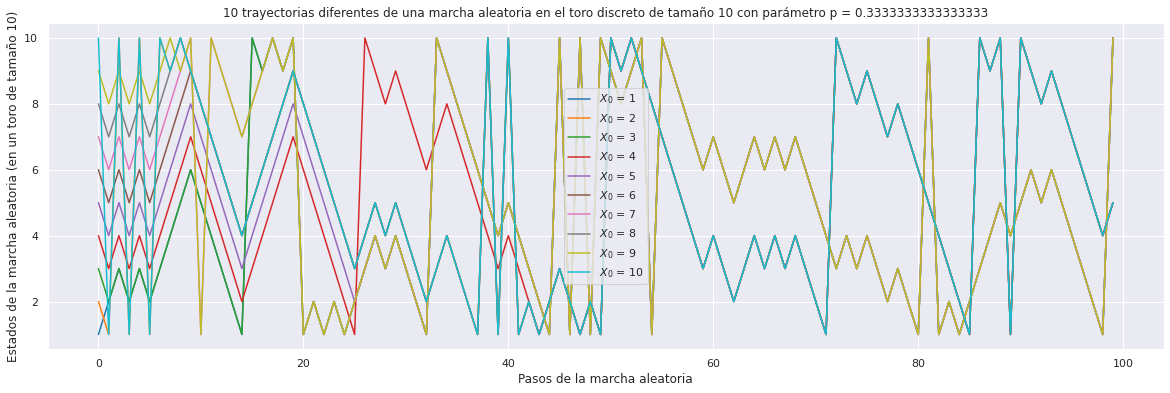

In [ ]:
# Resultados de las marchas aleatorias con los distintos parametros
graficar_marcha_aleatoria_en_toro(1/3)

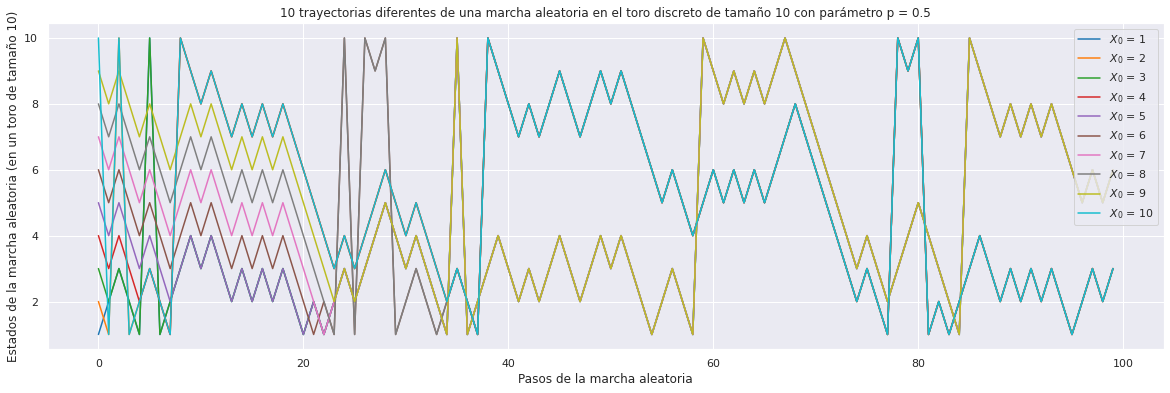

In [ ]:
graficar_marcha_aleatoria_en_toro(1/2)

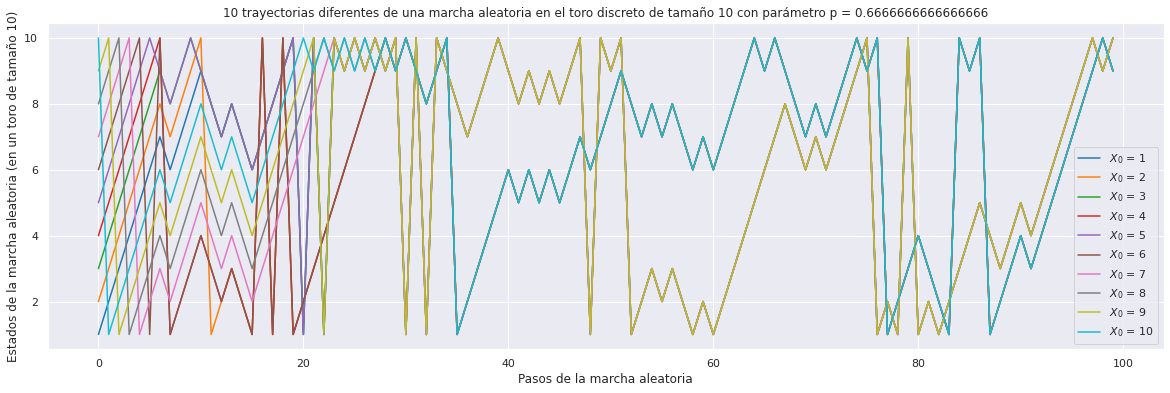

In [ ]:
graficar_marcha_aleatoria_en_toro(2/3)

**Sobre las figuras:**
1.   *Caso $p = 1/2$:* De los estados iniciales centrales es posible notar que durante la primera mitad de la marcha la cadena se mantiene centrada , esto es, en torno al estado inicial. 
2.   *Caso $p = 1/3$:* De los estados iniciales superiores ($I = 6,7,8,9,10$) es posible notar que la marcha tiende a bajar, al menos en la primera mitad de la marcha.
3.   *Caso $p = 2/3$:* De forma análoga, para los estados inferiores la marcha tiende a subir de estado.
4.   *Común a todos los casos:* En todos los casos de la marcha aleatoria, notamos que independiente del estado inicial las diferentes trayectorias se superponen, eso se obserba ya aproximadamente luego de 50 pasos se observan 2 o 3 marchas diferentes.

**Problema de la visualización:** Un problema de la visualización es que si la cadena se encuentra en el estado $X_{i} = 1$, y luego evoluciona a $X_{i+1} = 10$, en la figura se traza una linea que atraviesa todos los estados. Análogo con $X_{i} = 10$ y $X_{i+1} = 1$. Para graficar esto de otra forma más lúdica se proponen las coordenadas polares, donde el radio es el tiempo o cantidad de pasos y los ángulos representan los estados (dividiendo $360$ entre la cantidad de estados del espacio).

Aún así, no es conveniente utilizar coordenadas polares para visualizar muchas trayectorias de la marcha, debido a que no se distinguen y queda una interpretación difícil, sin embargo se puede visualizar una trayectoria. A continuación se muestra una trayectoria para cada caso.

<Figure size 1440x432 with 0 Axes>

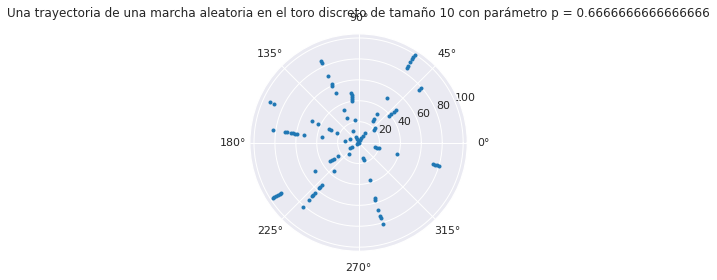

In [ ]:
graficar_marcha_aleatoria_en_toro_polares(2/3)

<Figure size 1440x432 with 0 Axes>

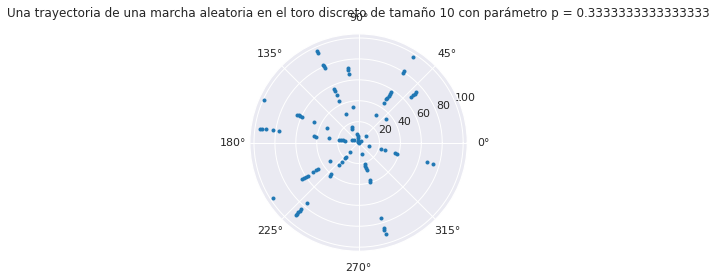

In [ ]:
graficar_marcha_aleatoria_en_toro_polares(1/3)

<Figure size 1440x432 with 0 Axes>

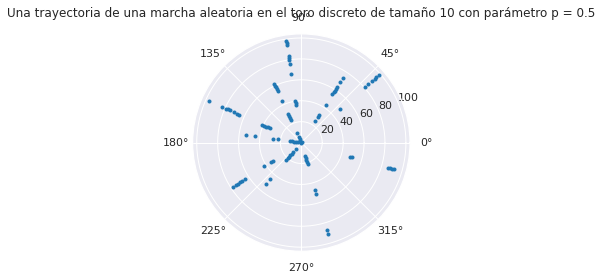

In [ ]:
graficar_marcha_aleatoria_en_toro_polares(0.5)

En las figuras anteriores se puede apreciar de forma lúdica cómo luce el espacio de estados, sin embargo no es fácil (aparentemente imposible) dilucidar la evolución de la cadena. 

# Problema 3 - Aplicación a un modelo de colas
Considere una cola a tiempo discreto a la que, en cada instanate $n\in\mathbb{N}$ llega un cliente con probabilidad $p\in(0,1)$ y no llegan clientes con probabilidad $1-p$. Durante cada intervalo de tiempo en que hay al menos un cliente en la cola, un cliente es atendido y sale de la cola con probabilidad $q\in(0,1)$ y no se va ningún cliente con probabilidad $1-q$. Denote por $X_{n}$ la cantidad de clientes en la cola en el instante $n$.

## Preliminares del problema 2
Para este problema podemos reciclar algunos métodos realizados en el problema 2, sin embargo se adjuntan en la siguiente celda de código ya que se realizó una leve modificación. Esta redundancia es para evitar ambigüedad al superponer ambos problemas en un mismo notebook.

In [ ]:
# metodos modificados del problema 2
def Trans(x, u, P):
    valor_transicion = 0
    suma = P[x,0]  
    while suma <= u: # Condicion de la probabilidad
      valor_transicion += 1
      suma += P[x,valor_transicion]
    output = valor_transicion
    return output
def CM(mu,P,n):
    cadena_de_markov = [mu]     # Cadena de markov con un estado inicial dado
    for i in np.arange(n-1):    # Hacemos transiciones para obtener muestras
        # Usamos la funcion Trans(x,)
        cadena_de_markov.append(
            Trans(cadena_de_markov[i], random.uniform(0,1),P)
            )
    output = cadena_de_markov 
    return output

## Parte 1

Notemos que la cantidad de personas en la fila en el instante $n$ es la cantidad de personas que había en el instante $n-1$ más 1 si en ese instante llegó alguien, menos 1 si había gente en la fila y en ese instante se fue alguien.

Llamando $X_n$ a la cantidad de personas en el instante $n$, $Y_n\sim Bernoulli(p)$ (que representa la llegada de una persona a la fila en el instante $n$) y $Z_n\sim Bernoulli(q)$ (que representa la salida de una persona de la fila en el instante $n$), se tiene que:
\begin{align*}
X_n = X_{n-1} + Y_n - \mathbb{1}_{X_{n-1}>0}Z_n
\end{align*}

Es fácil ver que la cadena $X_n$ es de Markov.

Notemos que desde el estado 0, la probabilidad de ir al estado 1 es de $p>0$.
Para el resto de los estados $i$, la probabilidad de ir al estado $i+1$ es de $p(1-q) > 0$ y la probabilidad de ir al estado $i-1$ es de $q(1-p) > 0$.



La matriz de transición $P$ asociada a $X$ es de la siguiente forma:

\begin{align*}
P_{0,0} = 1-p \hspace{10mm} P_{0,1} = p \hspace{10mm} P_{0,k} = 0 \hspace{3mm} \forall k>1\\
\forall\hspace{2mm} i \geq 1\hspace{10mm} P_{i, i-1} = q(1-p) \hspace{10mm} P_{i,i} = (1-p)(1-q) + pq \hspace{10mm} P_{i, i+1} = p(1-q) \hspace{10mm} P_{i,j} = 0 \hspace{3mm}\forall j \notin \{i-1, i, i+1\}\\
\end{align*}

Para ver que es irreducible, notemos que los estados posibles para $X_n$ son $\mathbb{N}$ (incluyendo el 0) y que las transiciones se ven de la siguiente forma:


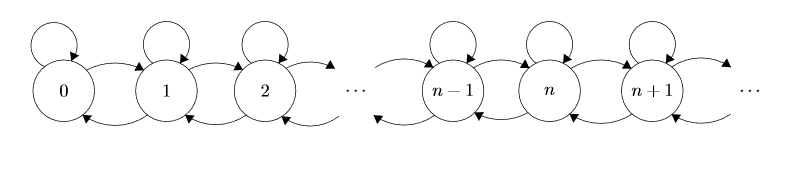


En la que todas las flechas están asociadas a probabilidades positivas, dadas por los coeficientes de $P$

De la imagen anterior se puede ver que para cualquier $i, j \in \mathbb{N}$ es posible llegar del estado $i$ al estado $j$ pasando por los estados intermedios, lo que ocurre con probabilidad positiva en cada caso, por lo que la cadena es irreducible.

Ahora se evaluará si la cadena es recurrente positiva, recurrente nula, o transiente, a partir de su distribución invariante $\pi$

Se tiene que en el caso de que $p>q$, $X_n$ diverge c.s. Luego, en particular se tendrá que $\mathbb{P}(\tau_0 = \infty) > 0$, ya que como diverge hay una probabilidad positiva de no retornar a 0.

Luego, en este caso se tendrá que la cadena es transiente.
 

Para el caso en que $p=q$, se tiene la medida invariante $\pi$ dada por
\begin{align*}
\pi_0 = 1-p, \hspace{10mm} \pi_x = 1 \hspace{4mm}\forall x\geq 1
\end{align*}

Notemos que $\pi$ cumple que
\begin{align*}
\sum\limits_{x\geq 0} \pi_x = \infty
\end{align*}
es decir, es una distribución invariante de masa infinita. Por lo tanto, como $X_n$ es irreducible se tiene que en este caso no existe una distribución invariante, por lo que $X_n$ no es recurrente positiva.

En este caso la cadena será recurrente nula.


Para el caso en el que $p<q$, se tiene la medida invariante $\pi$ dada por
\begin{align*}
\pi_0 = \frac{q-p}{q}, \hspace{10mm} \pi_x = \left ( \frac{p(1-q)}{q(1-p)}\right )^x \hspace{4mm}\forall x\geq 1
\end{align*}

Notemos que $\pi$ cumple que

\begin{align*}
\sum\limits_{x\geq 0} \pi_x &= \frac{q-p}{q} + \sum\limits_{x\geq 1} \left ( \frac{p(1-q)}{q(1-p)}\right )^x \frac{q-p}{q(1-q)}\\
&= \frac{q-p}{q} + \frac{q-p}{q(1-q)}\sum\limits_{x\geq 1} \left ( \frac{p(1-q)}{q(1-p)}\right )^x\\
&= \frac{q-p}{q} + \frac{q-p}{q(1-q)}\sum\limits_{x\geq 0} \left ( \frac{p(1-q)}{q(1-p)}\right )^x - \frac{q-p}{q(1-q)}\left ( \frac{p(1-q)}{q(1-p)}\right )^0\\
&= \frac{q-p}{q} + \frac{q-p}{q(1-q)}\sum\limits_{x\geq 0} \left ( \frac{p(1-q)}{q(1-p)}\right )^x - \frac{q-p}{q(1-q)}
\end{align*}

Además como se tiene que $p<q$, entonces $(1-q) < (1-p)$. Luego $p(1-q) < q(1-p)$, por lo que $\frac{p(1-q)}{q(1-p)}<1$.

Entonces lo anterior equivale a
\begin{align*}
\sum\limits_{x\geq 0} \pi_x &= \frac{q-p}{q} + \frac{q-p}{q(1-q)}\frac{1}{1 - \frac{p(1-q)}{q(1-p)}} - \frac{q-p}{q(1-q)}\\
&= \frac{q-p}{q} + \frac{q-p}{q(1-q)}\frac{1}{\frac{q(1-p) - p(1-q)}{q(1-p)}} - \frac{q-p}{q(1-q)}\\
&= \frac{q-p}{q} + \frac{q-p}{q(1-q)}\frac{q(1-p)}{q(1-p) - p(1-q)} - \frac{q-p}{q(1-q)}\\
&= \frac{q-p}{q} + \frac{q-p}{q(1-q)}\left( \frac{q(1-p)}{q(1-p) - p(1-q)} - 1  \right)\\
&= \frac{q-p}{q} + \frac{q-p}{q(1-q)} \frac{q(1-p) - (q(1-p) - p(1-q))}{q(1-p) - p(1-q)} \\
&= \frac{q-p}{q} + \frac{q-p}{q(1-q)} \frac{ p(1-q)}{q(1-p) - p(1-q)} \\
&= \frac{q-p}{q} \left( 1 + \frac{p}{q(1-p) - p(1-q)} \right)\\
&= \frac{q-p}{q} \left( 1 + \frac{p}{q-qp - p +pq} \right)\\
&= \frac{q-p}{q} \left( 1 + \frac{p}{q - p } \right)\\
&= \frac{q-p}{q} \frac{q - p + p}{q - p }\\
&= \frac{q-p}{q} \frac{q}{q - p }\\
&= 1
\end{align*}

Luego, la medida invariante $\pi$ es una distribución invariante, por lo que en este caso $X_n$ es recurrente positiva.

## Parte 2

Para poder simular la cadena, se trabajará asumiendo que la fila tiene una capacidad máxima de $N$ personas esperando, para un $N \in \mathbb{N}$ fijo.

La cadena $X_n'$ funcionará de la misma forma que antes, solo que con la restricción de que si ya hay $N$ personas en la fila no puede llegar nadie más.

Considerando las mismas $Y_n, Z_n$ de la parte anterior para representar que llegue una persona o se vaya una persona de la fila, en este caso se tendrá que
\begin{align*}
X_n' = X_{n-1}' + \mathbb{1}_{X_{n-1}<N}Y_n - \mathbb{1}_{X_{n-1}>0}Z_n
\end{align*}



Luego, notemos que como la fila parte vacía, se tendrá que

\begin{align*}
\mu = (1, 0, \dots , 0)
\end{align*}

Además, la matriz de transición $P$ de $X'$ es la siguiente:
\begin{align*}
P_{0,0} = 1-p \hspace{10mm} P_{0,1} = p \hspace{10mm} P_{0,k} = 0 \hspace{3mm} \forall k>1\\
\forall\hspace{2mm} 0< i< N \hspace{10mm} P_{i, i-1} = q(1-p) \hspace{10mm} P_{i,i} = (1-p)(1-q) + pq \hspace{10mm} P_{i, i+1} = p(1-q) \hspace{10mm} P_{i,j} = 0 \hspace{3mm}\forall j \notin \{i-1, i, i+1\}\\ 
P_{N, N-1} = q \hspace{10mm} P_{N, N} = 1-q \hspace{10mm} P_{N, k} = 0 \hspace{3mm} \forall k < N-1\\ 
\end{align*}

En el siguiente bloque de código se programó una función para generar la matriz de transición $P$ como una matriz de numpy, tomando como parámetros $N, p, q$.

In [ ]:
def gen_P(N, p, q):
  P = np.zeros((N+1,N+1))
  P[0,0] = 1-p
  P[0,1] = p
  for i in range(1, N):
    P[i,i-1] = q*(1-p)
    P[i, i] = (1-p)*(1-q) + p*q
    P[i,i+1] = p*(1-q)
  P[N, N-1] = q
  P[N, N] = 1-q
  return P


Se simulará la cadena en 3 casos: $p<q$, $p=q$, y $p>q$ para observar cómo cambia.

Para esto, se simulará $X_n$ para $n\leq 1000$

In [ ]:
n = 1000

Para el primer caso, en el que la cadena teóricamente era recurrente positiva, se escogieron valores de $p=0.2$ y $q=0.35$. Se observó que tendía a quedarse dentro de los primeros estados, por lo que se tomó un valor relativamente perqueño de $N$ para este caso, el que de todas formas no se alcanzó al simular.

También se tomó la misma cadena, pero partiendo de que hay una cantidad positiva de clientes en la cola, para observar su comportamiento en caso de no partir desde 0.

In [ ]:
# Caso 1: p<q, en este caso la cadena es recurrente positiva
# se considerara p=0.3, q=0.35, y N=200

p1 = 0.2
q1 = 0.35
N1 = 200

P1 = gen_P(N1, p1, q1)

sim1_0 = CM(0, P1, n)

sim1_100 = CM(100, P1, n)


Para el caso en el que $p=q$, teóricamente se obtuvo que la cadena era recurrente nula. Se escogieron los valores de $p=q=0.3$, y nuevamente un valor relativamente pequeño para $N$, que nuevamente no se alcanzó durante la simulación.

In [ ]:
# Caso 2: p=q, en este caso la cadena es recurrente nula
# se considerara p=q=0.3, y N=200

p2 = 0.3
q2 = 0.3
N2 = 200

P2 = gen_P(N2, p2, q2)

sim2_0 = CM(0, P2, n)

sim2_100 = CM(100, P2, n)

Para el caso en el que $p>q$, se tiene que la cadena teóricamente divergía, por lo que para simularla se optó por un valor mayor de $N$, de forma que no se alcanzase durante la simulación.

En este caso se escogieron $p=0.35$ y $q=0.15$.

También se comparó con una cadena con mayor valor de $X_0$.

In [ ]:
# Caso 3: p>q, en este caso la cadena sin truncar divergía. Para reflejar esto, se le dara una N grande, de forma que sea dificil llegar a ese estado
# se considera p=0.35, q=0.15, N=600

p3 = 0.35
q3 = 0.15
N3 = 600

P3 = gen_P(N3, p3, q3)

sim3_0 = CM(0, P3, n)

sim3_100 = CM(100, P3, n)

Teniendo lo anterior, es posible graficar las simulaciones para observar su forma.

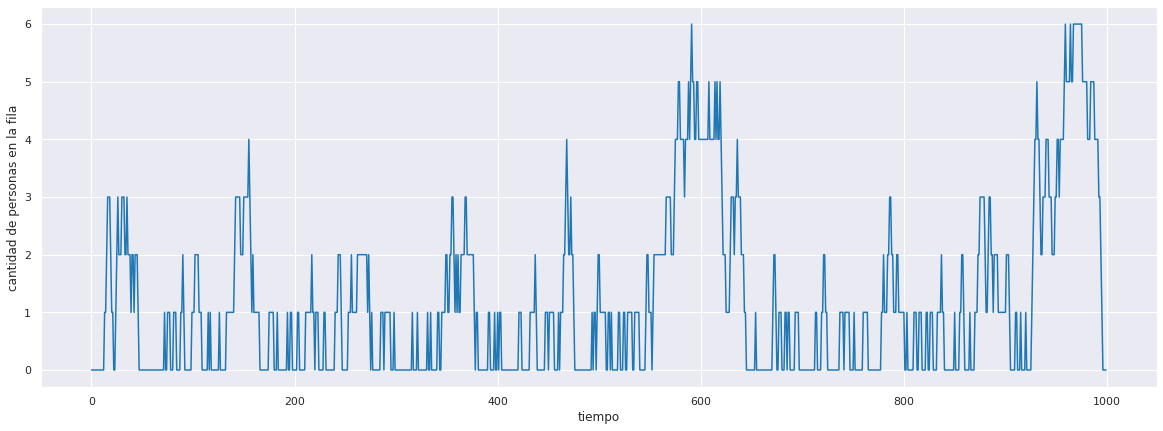

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(n), sim1_0)
plt.xlabel('tiempo')
plt.ylabel('cantidad de personas en la fila')
plt.grid()
plt.show()

A continuación, se compara la cadena anterior con aquella obtenida partiendo de una fila con una cantidad positiva de clientes inicialmente.

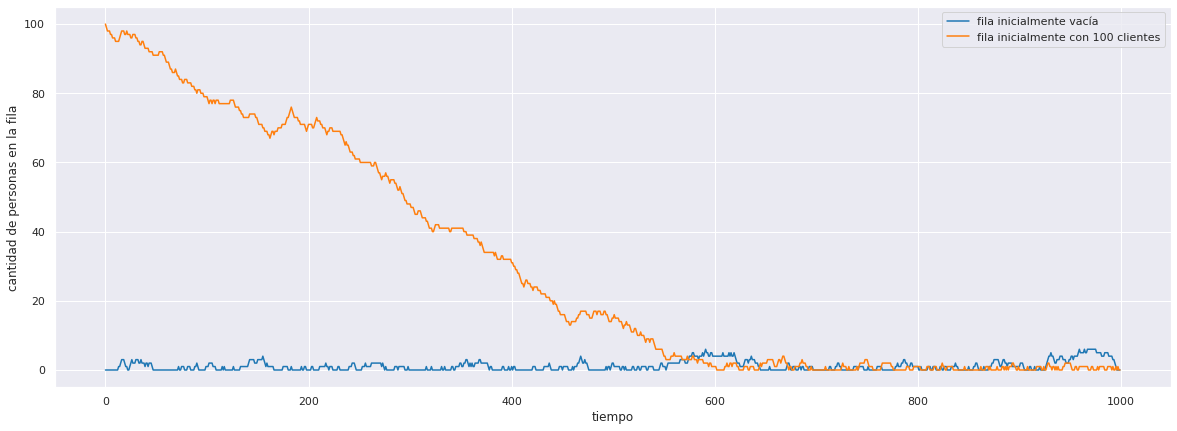

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(n), sim1_0, label='fila inicialmente vacía')
plt.plot(range(n), sim1_100, label='fila inicialmente con 100 clientes')
plt.xlabel('tiempo')
plt.ylabel('cantidad de personas en la fila')
plt.legend()
plt.grid()
plt.show()

En el gráfico anterior se observa que, si bien una de las filas inicia con 40 clientes, se va "vaciando" y a partir de un cierto punto ambas cadenas son bastante similares.

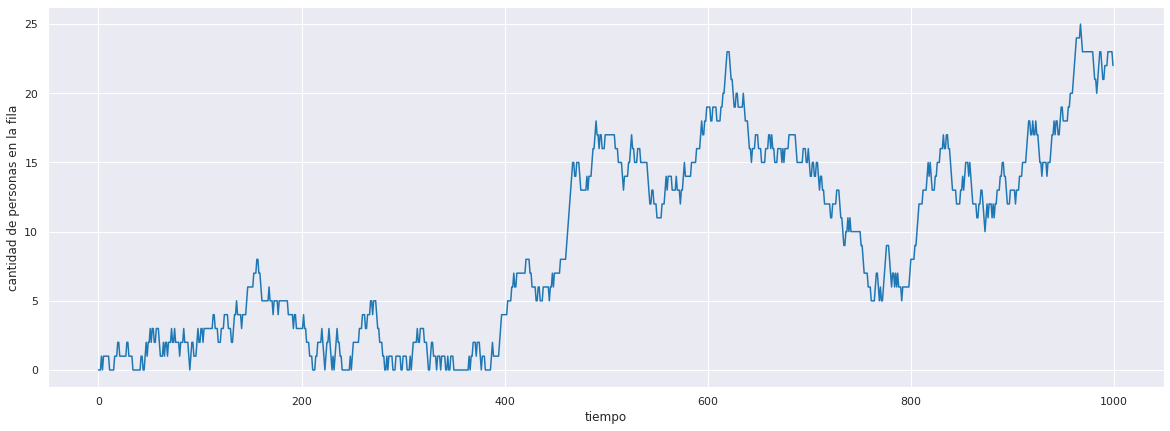

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(n), sim2_0)
plt.xlabel('tiempo')
plt.ylabel('cantidad de personas en la fila')
plt.grid()
plt.show()

Nuevamente se realizó la comparación de la fila originalmente vacía con la fila con 40 clientes originalmente.

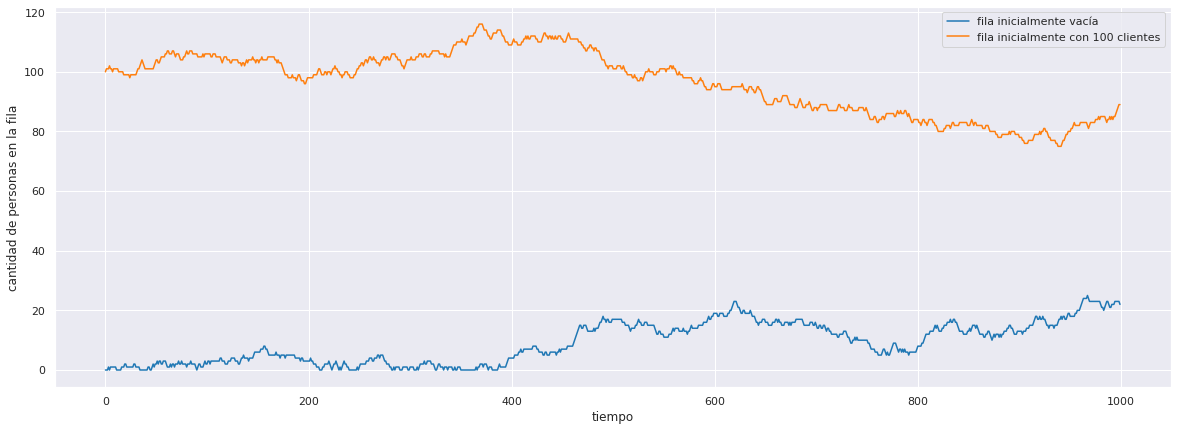

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(n), sim2_0, label='fila inicialmente vacía')
plt.plot(range(n), sim2_100, label='fila inicialmente con 100 clientes')
plt.xlabel('tiempo')
plt.ylabel('cantidad de personas en la fila')
plt.legend()
plt.grid()
plt.show()

En este caso, la cadena que partió con $X_0=100$ no tiende a vaciarse, y podemos observar que en ambos casos se quedan bastante más "cerca" de su estado inicial, pudiendo subir o bajar un poco.

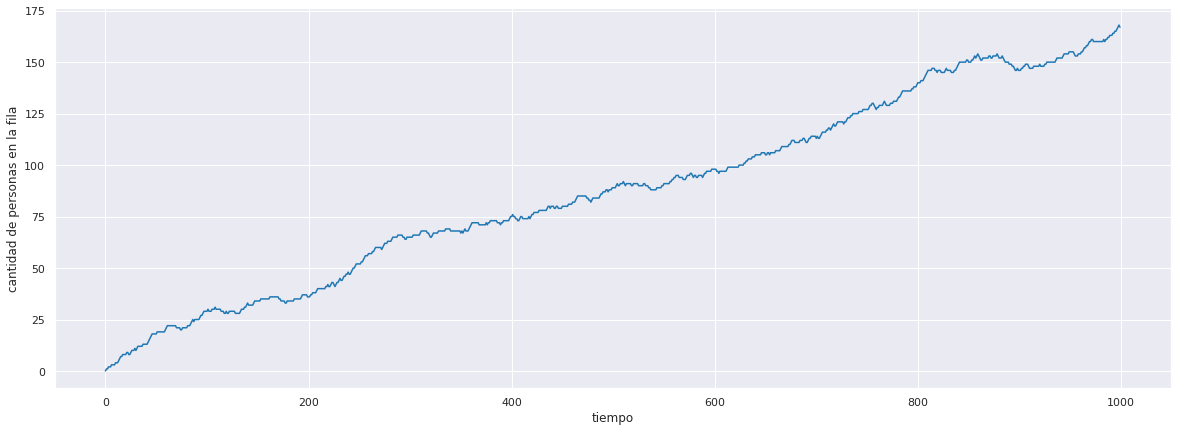

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(n), sim3_0)
plt.xlabel('tiempo')
plt.ylabel('cantidad de personas en la fila')
plt.grid()
plt.show()

Luego, se puede comparar con el caso en el que $X_0 > 0$

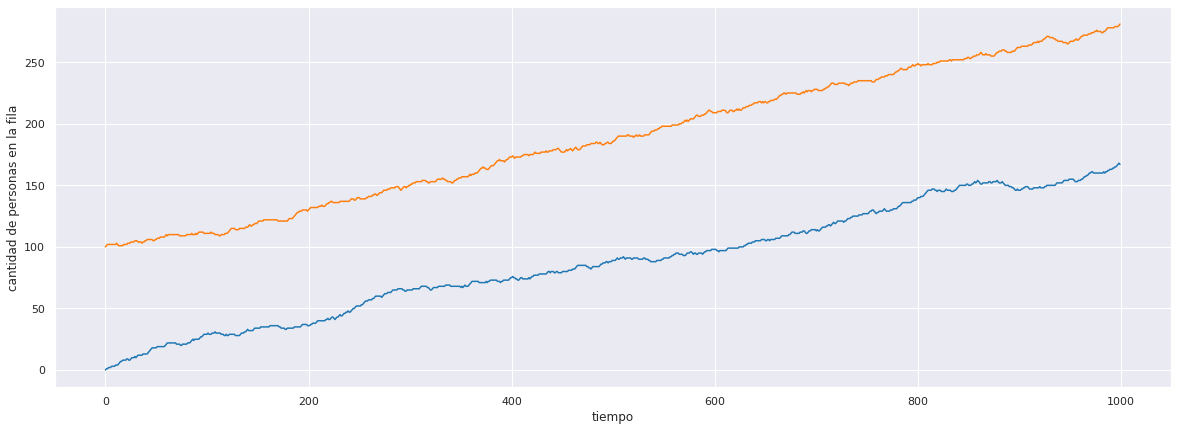

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(n), sim3_0, label='fila inicialmente vacía')
plt.plot(range(n), sim3_100, label='fila inicialmente con 100 clientes')
plt.xlabel('tiempo')
plt.ylabel('cantidad de personas en la fila')
plt.grid()
plt.show()

Notamos que en este caso ambas cadenas son de forma similar, y en ambos casos parecen diverger.

También es posible notar que ambas curvas parecen tener una pendiente promedio similar. Podría estudiarse a futuro la relación de esta pendiente con los valores de $p$ y $q$.

También se graficaron las 3 curvas con $X_0=0$ juntas, para realizar una comparación.

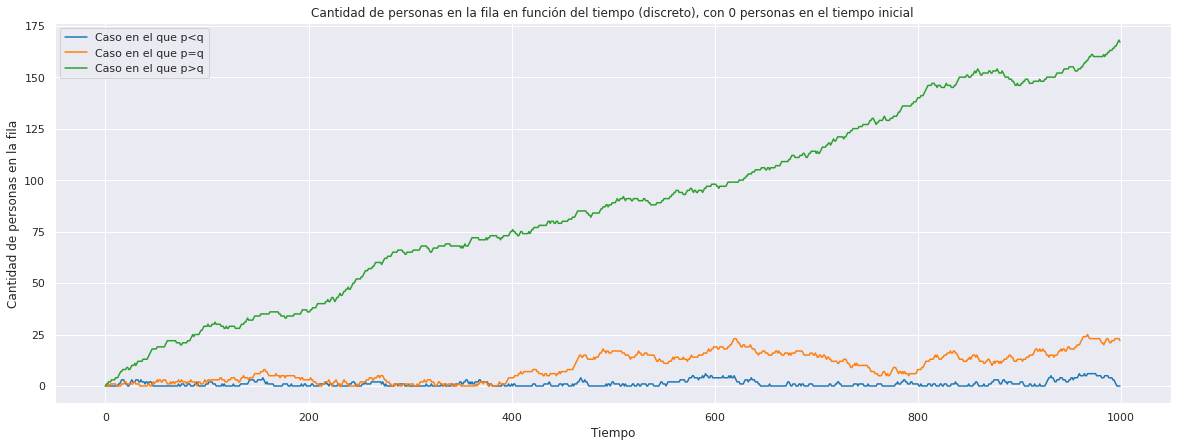

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(n), sim1_0, label='Caso en el que p<q')
plt.plot(range(n), sim2_0, label='Caso en el que p=q')
plt.plot(range(n), sim3_0, label='Caso en el que p>q')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de personas en la fila')
plt.title('Cantidad de personas en la fila en función del tiempo (discreto), con 0 personas en el tiempo inicial')
plt.legend()
plt.grid()
plt.show()

De lo anterior, podemos observar que la "fila" que más rápidamente se llena y más crece es la correspondiente al caso en el que $p>q$. Esto coincide con la intuición de que si llega más gente a una fila que la que se va, entonces la fila se hará cada vez más larga, mientras que si la gente en la fila es atendida más rápido que lo que llegan personas nuevas, la fila tenderá a ser corta todo el tiempo, e incluso a quedarse vacía a ratos.

Las formas de las curvas también se relacionan con lo esperable para distribuciones recurrentes positivas, recurrentes nulas y transientes. En particular, para el caso recurrente positivo podemos ver que la cadena siempre "se devuelve", para el recurrente nulo que si bien no "explota" la cadena de todas formas tiende a crecer, y en el caso transiente casi que "explota".

Sin embargo, es un poco contraintuitivo si se considera el significado de que una cadena de markov sea irreducible: teóricamente, existe una probabilidad de llegar a cualquier estado posible de la cadena, sin embargo, al simularlo no ocurrió esto, se llegó a un subconjunto bastante reducido de todos los estados posibles y no pareciera que la cadena subiría mucho más que eso si se simulara por más tiempo.

Luego se graficaron juntos los 3 casos en los que $X_0=100$ 

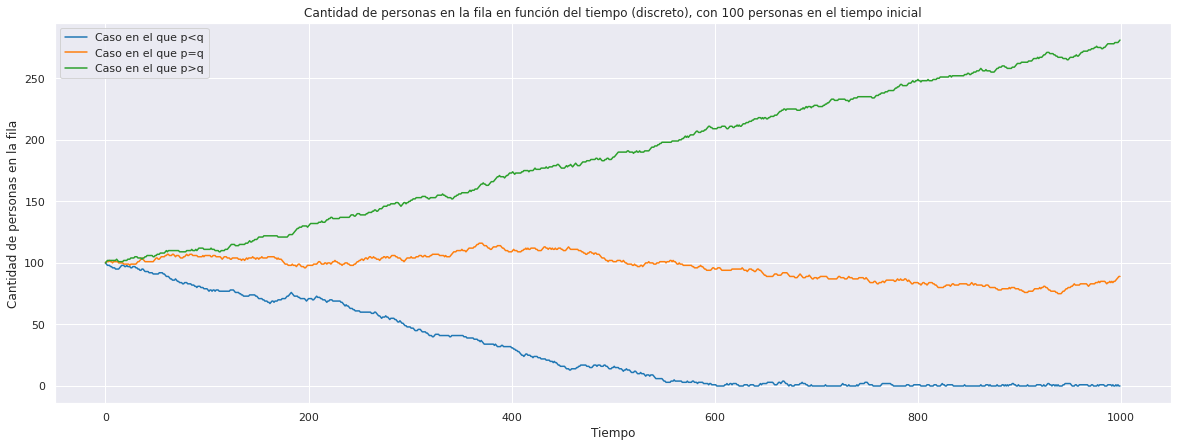

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(range(n), sim1_100, label='Caso en el que p<q')
plt.plot(range(n), sim2_100, label='Caso en el que p=q')
plt.plot(range(n), sim3_100, label='Caso en el que p>q')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de personas en la fila')
plt.title('Cantidad de personas en la fila en función del tiempo (discreto), con 100 personas en el tiempo inicial')
plt.legend()
plt.grid()
plt.show()

En este caso, es fácil observar que las 3 cadenas tienen comportamientos bastante distintos.

Podría intuirse que en el caso que $p>q$ la cadena diverge, en el caso que $p=q$ la cadena converge a su valor inicial y en el caso $p<q$ converge a 0.

Esto nuevamente tiene sentido con el problema simulado: si llegan más personas de las que se van, la fila es cada vez más larga, si se van más personas de las que llegan, la fila es cada vez más corta, y si llega igual cantidad de personas que la que se va, la fila permanece más o menos del mismo largo todo el tiempo.

## Parte 3

El objetivo de esta parte es comparar distintas estrategias para simular la distribución invariante de la cadena, en el caso en que $p<q$ (ya que este es el único en el que existe una distribución invariante).

Para esto, se escogieron los valores $p=0.2$ y $q=0.3$, y como ya se vió que no es necesario un valor grande de $N$, se tomó $N=30$ preliminarmente.

Además se definió una función que calcula el valor teórico de la media invariante para poder compararlo con los resultados obtenidos en cada simulación, y se generó la matriz de transición $P$ usando la misma función de la parte anterior.

In [ ]:
p = 0.2
q = 0.3
N = 30

def pi_teo(p, q, x):
  if x==0:
    output = (q-p)/q
  else:
    a = (p*(1-q))/(q*(1-p))
    b = (q-p)/(q*(1-q))
    output = a**x * b
  return output

P = gen_P(N, p, q)

Para obtener la media empírica, se programó una función que realiza $K$ simulaciones independientes de la cadena, hasta el tiempo $T$ en cada caso, y posteriormente toma el último valor de cada simulación para calcular la frecuencia de cada uno.





In [ ]:
def medida_empirica(K, T, P):
  c = np.zeros(N+1)
  for i in range(K):
    cm = CM(0, P, T)
    estado = cm[T-1]
    c[estado] += 1
  c = c/K
  return c

Para obtener la media ergódica, se programó una función que simula una vez la cadena de markov hasta el tiempo $T$ y cuenta las ocurrencias de cada estado, para luego calcular la media.

In [ ]:
def media_ergodica(T, P):
  c = np.zeros(N+1)
  cm = CM(0, P, T)
  for i in range(len(cm)):
    estado = cm[i]
    c[estado] += 1
  c = c/T
  return c

Teniendo lo anterior, se corrieron las funciones anteriores, midiendo el tiempo que tomaba cada una en generar $m = 10000$ datos de los que calcular la media.

En el caso de la medida empírica, esto implica que se debe escoger $K=m$, y en el caso de la media ergódica, escoger $T=m$. Para el caso de la medida empírica, se escogió además $T=1000$.

In [ ]:
m = 10000

K_empirica = m
T_empirica = 1000

T_ergodica = m

empirica_ini = time.perf_counter()
med_empirica = medida_empirica(K_empirica, T_empirica, P)
empirica_fin = time.perf_counter()
tiempo_empirica = empirica_fin - empirica_ini

ergodica_ini = time.perf_counter()
med_ergodica = media_ergodica(T_ergodica, P)
ergodica_fin = time.perf_counter()
tiempo_ergodica = ergodica_fin - ergodica_ini


Se generaron histogramas para mostrar las estimaciones de $\pi$ en cada caso, comparándose con el valor conocido teóricamente.

In [ ]:
# se genera una lista con los valores teoricos de pi para comparar

pi_t = []
for i in range(N+1):
  pi_t.append(pi_teo(p,q,i))

print(pi_t)
print(med_empirica)
print(med_ergodica)

[0.33333333333333326, 0.2777777777777777, 0.16203703703703695, 0.09452160493827155, 0.0551376028806584, 0.03216360168038406, 0.01876210098022403, 0.010944558905130684, 0.006384326027992899, 0.0037241901829958572, 0.00217244427341425, 0.0012672591594916455, 0.0007392345097034598, 0.0004312201306603515, 0.0002515450762185383, 0.00014673462779414735, 8.559519954658594e-05, 4.993053306884179e-05, 2.9126144290157708e-05, 1.699025083592533e-05, 9.910979654289773e-06, 5.7814047983357e-06, 3.3724861323624916e-06, 1.967283577211453e-06, 1.1475820867066807e-06, 6.694228839122303e-07, 3.9049668228213433e-07, 2.27789731331245e-07, 1.3287734327655955e-07, 7.751178357799308e-08, 4.521520708716262e-08]
[3.309e-01 2.810e-01 1.628e-01 9.150e-02 5.280e-02 3.260e-02 2.000e-02
 1.180e-02 6.700e-03 4.500e-03 2.100e-03 2.000e-03 8.000e-04 1.000e-04
 1.000e-04 1.000e-04 1.000e-04 0.000e+00 1.000e-04 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+0

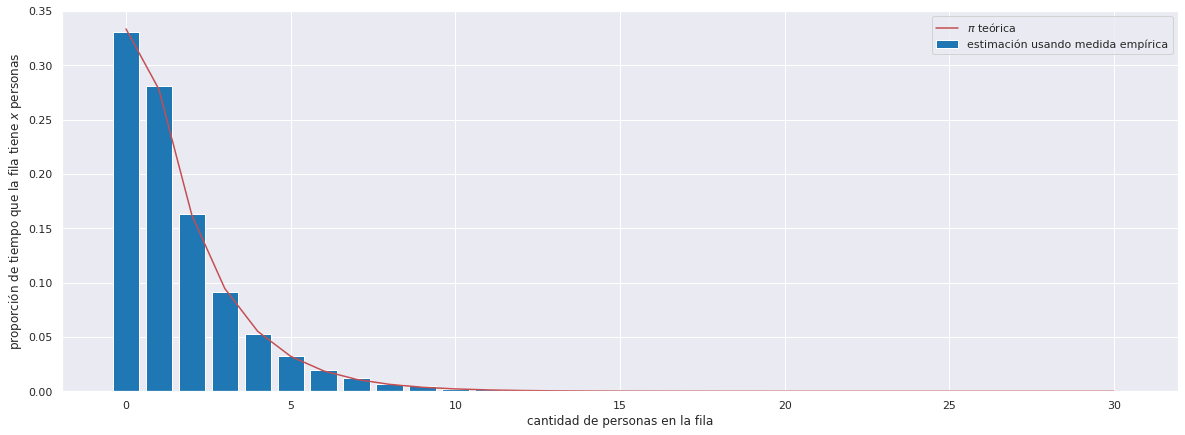

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(np.arange(N+1), med_empirica, label='estimación usando medida empírica')
plt.plot(range(N+1), pi_t, label='$\pi$ teórica', color='r')
plt.legend()
plt.xlabel('cantidad de personas en la fila')
plt.ylabel('proporción de tiempo que la fila tiene $x$ personas')
plt.grid()
plt.show()

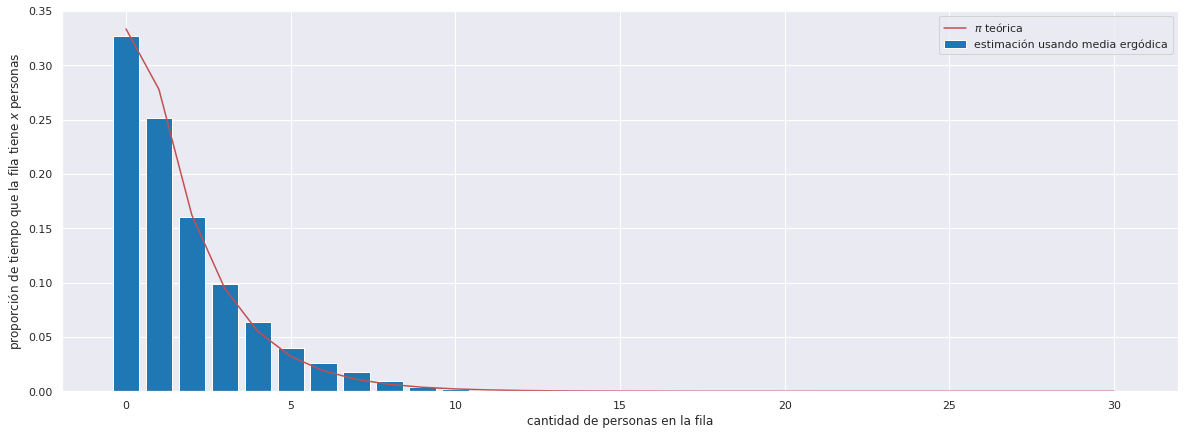

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(np.arange(N+1), med_ergodica, label='estimación usando media ergódica')
plt.plot(range(N+1), pi_t, label='$\pi$ teórica', color='r')
plt.legend()
plt.xlabel('cantidad de personas en la fila')
plt.ylabel('proporción de tiempo que la fila tiene $x$ personas')
plt.grid()
plt.show()

De los gráficos anteriores, se puede observar que si bien ambos métodos aproximan bastante bien a la medida teórica $\pi$, en el caso de la medida empírica podría ser un poco mejor.

Luego de lo anterior, se generó una tabla para comparar los tiempos de ejecución de ambos métodos, utilizando los dataframes de pandas.

In [ ]:
data = [['medida empírica', tiempo_empirica], ['media ergódica', tiempo_ergodica]]
df = pd.DataFrame(data, columns=['método de estimación', 'tiempo de ejecución'])

df

,método de estimación,tiempo de ejecución
0,medida empírica,17.250997
1,media ergódica,0.022975


De la tabla anterior se puede apreciar que el tiempo de ejecución utilizando el método de medida empírica es significativamente mayor que el de media ergódica, siendo casi 1000 veces más. Esto tiene sentido, ya que en el primero se simulan $m$ cadenas de markov mientras que en el segundo solo se simula una cadena.

Considerando lo anterior, puede concluirse que el método de la media ergódica es mejor para estimar la medida $\pi$, ya que se obtiene un resultado bastante similar y en una cantidad mucho menor que con el otro método.